
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to answer the questions provided below


## <span style="color:blue">Data Description

The job bulletins will be provided as a folder of plain-text files, one for each job classification.

Job Bulletins: 683 plain-text job postings

Instructions and Additional Documents:

- Job Bulletins with Annotations

- Annotation Descriptions.docx

- City Job Paths

- PDFs

- Description of promotions in job bulletins.docx

- Job_titles.csv

- Kaggle_data_dictionary.csv


In [64]:
import pandas as pd

columns = [
    "FILE_NAME", "JOB_CLASS_TITLE", "JOB_CLASS_NO", "JOB_DUTIES",
    "EDUCATION_YEARS", "SCHOOL_TYPE", "EDUCATION_MAJOR", "EXPERIENCE_LENGTH",
    "FULL_TIME_PART_TIME", "EXP_JOB_CLASS_TITLE", "COURSE_COUNT",
    "COURSE_LENGTH", "COURSE_SUBJECT", "DRIVERS_LICENSE_REQ",
    "EXAM_TYPE", "ENTRY_SALARY", "OPEN_DATE", "REQUIREMENT_SET_TEXT" 
]

job_bulletins_df = pd.DataFrame(columns=columns)
job_bulletins_df 

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_COUNT,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY,OPEN_DATE,REQUIREMENT_SET_TEXT


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

In [65]:
from pathlib import Path
import re

def extract_data_from_file(file_content):
     
    file_name = Path(file_path).stem
    job_class_title =re.search(r'([\s\S]*?)(Class|EXEMPT EMPLOYMENT OPPORTUNITY)', content, re.MULTILINE)
    job_class_no = re.search(r'Class Code:\s+(\d+)\s', content) 
    job_duties = re.search(r'(DUTIES|DUTY)\s+(.*)', content, re.DOTALL)
    open_date=get_open_date(content)
    #re.search(r"(Open [Dd]ate|DATE):\s*(\d{1,2}-\d{1,2}-\d{2})" ,content)
    #\s* matches any whitespace (including none) between "Open Date:" and the date itself.
    entry_salary =get_annual_salary(content)#ANNUAL SALARY\s*\n\n(.*?)\n
    school_type = extract_school_type(content)
    education_major= extract_section_EDUCATION_MAJOR(content)
    #experience_length =extract_experience_length(content)
    education_years=get_education_years(content)
    full_time_part_time = re.search(r'full[- ]time|part[- ]time', content, re.IGNORECASE)
    #regex will match "full-time" as well as "full time" ,,,,,[- ]: character class that matches either a hyphen - or a space 
    requirement_set_text=extract_section_requirement_set_text(content)
    exp_job_class_title=get_ex_job_title(content ,requirement_set_text)
    #Course Length In Months
    experience_length =Extract_experience_lenght(content)
    #full_time_part_time = re.search(r'full[- ]time|part[- ]time', content, re.IGNORECASE)
    #exp_job_class_title =get_ex_job_title(content ,requirement_set_text)
    course_count = get_course_counts(content)
    course_length = get_course_length (content ,course_count)
    course_subject =get_course_Subject(content ,course_count)
    drivers_license_req = re.search(r"driver'?s? license" , content, re.IGNORECASE)                       
    exam_type=extract_section_Exam_Type(content)
   
    #***********************************************************************************************************************
    extracted_data = {
        "FILE_NAME": file_name,
        "JOB_CLASS_TITLE": job_class_title.group(1).strip() if job_class_title else None,
         
        "JOB_CLASS_NO": job_class_no.group(1).strip() if job_class_no else None,
        "JOB_DUTIES": job_duties.group(2).strip() if job_duties else None,
        #"OPEN_DATE": open_date,
        "OPEN_DATE":open_date ,
        #open_date.group(1).strip() if open_date else None,
        "ENTRY_SALARY": entry_salary ,
        "SCHOOL_TYPE":school_type,

        "EDUCATION_MAJOR": education_major,
        "EDUCATION_YEARS": education_years,
        "EXPERIENCE_LENGTH":experience_length,
         #experience_length, exp_job_class_title
         #I take the values(fulltime or part time) from the EXPERIENCE so if there is no values i take it by default to full_time
        "FULL_TIME_PART_TIME": full_time_part_time.group(0).strip() if full_time_part_time else 'full_time',
       
        "COURSE_COUNT": course_count,
        "COURSE_LENGTH": course_length,
        "COURSE_SUBJECT": course_subject,
        "DRIVERS_LICENSE_REQ": "Yes" if drivers_license_req else "No",
        "EXAM_TYPE":exam_type,
        "REQUIREMENT_SET_TEXT": requirement_set_text,
        
         "EXP_JOB_CLASS_TITLE": exp_job_class_title,
      
       
    }   

    return extracted_data
#-------------------------------------------------------------------------------------------
def get_open_date(content):
    data=re.search("(\d\d-\d\d-\d\d)[\s\S]*ANNUAL",content)
    if data:
        return data.group(1)
    else:
        data = re.search("(\d-\d\d-\d\d)[\s\S]*ANNUAL", content)
        if data:
            return data.group(1)
        else:
            data = re.search("DATE:\s+(.*)\s", content)
            if data:
                return data.group(1)
            else:
                return None
def get_number(string_number):
    dict_numbers = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9}
    return dict_numbers[string_number.lower()]
#----------------------------------------------------------------------------------------------------
def get_annual_salary(content):
    salary=re.search("ANNUAL\s+SALARY\s+(.*)",content)
    if salary:
        return salary.group(1).strip()
    else:
        salary=re.search("ANNUALSALARY\s+(.*)",content)
        if salary:
            return salary.group(1).strip()
        else:
            return None

#-------------------------------------------------------------------------------------------------------------
def get_course_counts(text_data):
    numbers = 'one|two|three|four|five|six|seven|eight|nine|ten'  # Extend this list as needed
    pattern = fr"({numbers})\s+(course|courses|-courses)"

    counts_match = re.search(pattern, text_data, re.IGNORECASE)
    if counts_match:
        worded_number = counts_match.group(1).lower()  # Lowercase for consistent dictionary lookup
        return get_number(worded_number)
    else:
        # Count occurrences of 'course' or 'courses'
        course_count = len(re.findall(r"\bcourse\b", text_data, re.IGNORECASE))
        return course_count
def get_course_length(text_data, count):
    if count!=0:
        length=re.search(f"( courses| course|courses|course|-courses|-course).*?({numbers})",text_data,re.DOTALL|re.IGNORECASE|re.I)
        if length:
            length=length.groups(2)[1].upper()
            number=get_number(length)
            return number
        else:
            return None
    else:
        return 0
import re

def get_course_Subject(text_data, count):
    if count > 0:
        pattern = r"annotated with (.*?)\)"
        matches = re.findall(pattern, text_data, re.IGNORECASE)
        subjects = []
        for match in matches:
        
            courses = match.split(',')
            
            subjects.extend([course.strip() for course in courses if course.strip()])

        return "Not Mentioned" if not subjects else subjects  # not mentioned courses, so return "Not Mentioned" 

    return "Not Required"  # No courses, so return "Not Required"


#------------------------------------------------------------------------------------------------------------------
def extract_section_Exam_Type(content, pattern1=r'(by Interview|Interview|written tests|weighted multiple-choice)'
                             ,pattern2=r'(Examination Weight:|Examination Weights)\s* (\w)(.*?)\s*[\.\s]*100%'):
    
    match = re.search(pattern2, content, re.DOTALL)
    if match:
        return match.group(0).strip()
    match = re.search(pattern1, content, re.DOTALL)
    if match:
        return match.group(0).strip()
    return "Nan"
#------------------------------------------------------------------------------------------------------------------  
import re

def extract_exp_job_class_title(content):
    # Regex pattern to capture job titles following specific phrases
    pattern = r'experience (?:as|in) a? ([\w\s]+) with the City of Los Angeles'

    # Find all matches
    matches = re.findall(pattern, content)

    # Process matches
    job_titles = [match.strip() for match in matches]

    return job_titles if job_titles else "No job titles found"

# Example usage


#----------------------------------------------------------------------------------------------------------------------
part_or_full='part-time or full-time|full-time or part-time|part or full|full or part|part-time|full-time|PART-TIME|FULL-TIME|fulltime|parttime|full time|part time'
requirements_tag='|'.join(["REQUIREMENT/MIMINUMUM QUALIFICATION",
                  "REQUIREMENT/MINUMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATIONS",
                  "REQUIREMENT/ MINIMUM QUALIFICATION",
                  "REQUIREMENTS/MINUMUM QUALIFICATIONS",
                  "REQUIREMENTS/ MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM REQUIREMENTS",
                  "REQUIREMENTS/MINIMUM QUALIFCATIONS",
                   "REQUIREMENT/MINIMUM QUALIFICAITON",
                  "MINIMUM REQUIREMENTS:",
                  "REQUIREMENTS",
                  "REQUIREMENT"])
numbers='one|One|two|Two|three|Three|four|Four|five|Five|six|Six|seven|Seven|eight|Eight|nine|Nine'
def Extract_experience_lenght(requirements_data):
    exp=re.search(f"({numbers})\s(years|year).*\s(full-time|part-time)",requirements_data,re.DOTALL|re.IGNORECASE|re.I)
    if exp: 
        exp=exp.group(1).upper()
        number = get_number(exp)
        return number
    else:
        exp = re.search(f"(full-time|part-time).*?({numbers})\s(years|year)", requirements_data,re.DOTALL | re.IGNORECASE)
        if exp:
            exp=exp.group(2).upper()
            number = get_number(exp)
            return number
        else:
            exp = re.search(f"({part_or_full})[\s\S]*?({numbers})", requirements_data,re.DOTALL | re.IGNORECASE)
            if exp:
                exp=exp.group(2).upper()
                number = get_number(exp)
                return number
            else:
                return 0

#

def get_education_years(requirements_data):
    years = re.search(f"({numbers})[/s-]year.*?({school})", requirements_data,re.DOTALL|re.IGNORECASE)
    if years:
        years=years.groups(1)[0].upper()
        number = get_number(years)
        return number
    else:
        years = re.search(f"({numbers})[/s-]year[\s\S]*?({school})", requirements_data, re.DOTALL | re.IGNORECASE )
        if years:
            years=years.groups(1)[0].upper()
            number = get_number(years)
            return number
        else:
            years = re.search(f"({requirements_tag})[\s\S]*({numbers})\s+(years|year)[\s\S]*?({school})", requirements_data,re.DOTALL | re.IGNORECASE)
            if years:
                years=years.groups(2)[1].upper()
                number = get_number(years)
                return number
            else:
                return 0

#-----------------------------------------------------------------------------------
education_majors='|'.join(["Agribusiness Operations","Airport Guide","computer engineering","Airport","Agricultural Business","Agricultural Economics","carpet layer","Agricultural Mechanization","Agricultural Production","Agronomy & Crop Science","Agriculture","Animal Sciences","Food Sciences ","Horticulture Operations & Management","Horticulture Science","Natural Resources Conservation","Environmental Science","Forestry","Natural Resources Management","Wildlife & Wildlands Management","Architecture","Architectural Environmental Design","Regional Planning","Interior Architecture","Landscape Architecture","African American Studies","Women’s Studies","Liberal Arts","General Studies","Library Science","Interdisciplinary","Art History","Criticism","Studio Arts"," Art ","Cinematography","Video Production","Dancing","Design & Visual Communications","Fashion","Apparel Design","Graphic Design","Industrial Design","Interior Design","Music","Photography","Theatre Arts","Drama","Accounting Technician","Accounting","Business Administration & Management","Hotel Management","Human Resources Management","Human Resources ","International Business Management","Labor","Industrial Relations","Logistics & Materials Management","Marketing Management & Research","Office Supervision & Management","Operations Management & Supervision","Organizational Behavior","Contracts Management","Food Services Management","Small Business Management/Operations","Tourism Management",
                           "Actuarial Science","auto body and fender repairer","auto body builder","body builder","Business","Managerial Economics","Finance","Banking & Financial Support Services","Financial Planning & Services","Insurance & Risk Management","Investments & Securities","Management Information Systems","Real Estate","Sales","Merchandising","Marketing","Fashion Merchandising","Tourism & Travel Marketing","Secretarial Studies & Office Administration","Communications","Advertising","Digital Communications","Media","Journalism","Mass Communications","Public Relations & Organizational Communication","Radio & Television Broadcasting","Communications","Graphic & Printing Equipment Operation","Multimedia","Animation","Special Effects","Radio & Television Broadcasting","Family & Consumer Sciences","Adult Development & Aging/Gerontology","Child Care Services Management","Child Development","Consumer & Family Economics","Food & Nutrition","Textile & Apparel","Parks, Recreation, & Leisure","Exercise Science","Physiology","Kinesiology","Physical Education","Fitness","Administration Management","Personal Services","Cosmetology","Culinary Arts","Chef Training","Funeral Services & Mortuary Science","Protective Services","Corrections","Criminal Justice","Fire Protection & Safety","Law Enforcement","Military Technologies","Public Administration & Services","Community Organization & Advocacy","Public Administration","Public Affairs & Public Policy Analysis","Social Work","COMPUTER SCIENCE",
                    "Geographical Information Systems","Information System","MATHEMATICS","Computer & Information Sciences","Computer Networking","Telecommunications","Computer Programming","Computer Software & Media Applications","Computer System Administration","Data Management","Information Science","Webpage Design","Mathematics","Applied Mathematics","Statistics","Counseling & Student Services","Educational Administration","Special Education","Teacher Education","Curriculum","Early Childhood Education","Elementary Education","Junior High/Middle School Education","Postsecondary Education","Secondary Education","Teacher Assisting","Aide Education","Teacher Education, Subject-Specific","Agricultural Education","Art Education","Business Education","Technical Education","English-as-a-Second-Language Education","English/Language Arts Education","Foreign Languages Education","Health Education","Mathematics Education","Music Education","Physical Education","Science Education","Social Studies","Sciences Education","Aerospace Engineering","Aeronautical Engineering","Agricultural/Bioengineering","Architectural Engineering","Biomedical Engineering","Chemical Engineering","Civil Engineering","Computer Engineering","Construction Engineering/Management","Electrical, Electronics & Communications Engineering","Environmental Health Engineering","Industrial Engineering","Mechanical Engineering","Nuclear Engineering","ENGINEERING TECHNOLOGY & DRAFTING",
                           "Architectural Drafting","Mechanical Drafting","Engineering","engineering","Drafting","Aeronautical/Aerospace Engineering Technologies","Architectural Engineering","Automotive Engineering","Civil Engineering","Computer Engineering","Construction","Engineering","Electrical Engineering","Electronics Engineering","Electromechanical Engineering","Electromechanical ","Biomedical Engineering","Environmental Control","Industrial Production Technologies","Mechanical Engineering","Quality Control & Safety Technologies","Surveying","English Language ","American/English Literature","Creative Writing","Public Speaking","Foreign Languages","Asian Languages ","Ancient Languages ","Literatures","Comparative Literature","French Language & Literature","German Language & Literature","Linguistics","Middle Eastern Languages & Literatures","Spanish Language & Literature","HEALTH ADMINISTRATION & ASSISTING","Health Services Administration","Facilities Administration","Medical Office","Secretarial","Medical Records","Medical Clinical Assisting","Dental Assisting","Medical Assisting","Occupational Therapy Assisting","Physical Therapy Assisting","Veterinarian Assisting","HEALTH SCIENCES & TECHNOLOGIES","Chiropractic","Dental Hygiene","Dentistry","Emergency Medical","Health-Related Professions & Services","Athletic Training","Public Health","Medical Laboratory","Medical Radiologic","Nuclear Medicine","Respiratory Therapy","Building and Safety","Safety and Health",
                           "Surgical","Medicine","Nursing, Practical","Nursing, Registered","Pharmacy ","Physician Assisting","Therapy & Rehabilitation","Alcohol/Drug Abuse Counseling","Massage Therapy","Mental Health Counseling","Occupational Therapy","Physical Therapy ","Psychiatric","Mental Health Technician","Rehabilitation Therapy","Vocational Rehabilitation Counseling","Veterinary Medicine","PHILOSOPHY","Theology","Biblical Studies","Divinity","Ministry","Marketing","refrigeration and air conditioning","refrigeration","air conditioning","Religious Education","Aviation & Airway Science","Aircraft Piloting & Navigation","Aviation Management & Operations","Construction Trades","Mechanics & Repairers","Aircraft Mechanics/Technology","Autobody Repair/Technology","Automotive Mechanics/Technology","Avionics","Diesel Mechanics","Electrical/Electronics Equip Installation & Repair","Precision Production Trades","Machine Tool","Welding","Biology","Biochemistry & Biophysics","Cellular Biology","Ecology","Genetics","Marine/Aquatic Biology","Microbiology & Immunology","Zoology","Physical Sciences","Astronomy","Atmospheric Sciences & Meteorology","Chemistry","Geological & Earth Sciences","Physics","SOCIAL SCIENCES & LAW","Legal Studies","Court Reporting"," Law ","Legal Administrative Assisting/Secretarial","Paralegal/Legal Assistant","Social Sciences","Anthropology","Criminology","Economics","Geography","History","International Relations & Affairs","Political Science & Government","Clinical & Counseling","Psychology","Sociology","Science","Accounting","acounting","engineering","Maintenance"])
school = "college or university|university or college|high school|college|" \
         "apprenticeship|university|school"
def extract_section_EDUCATION_MAJOR(text_data):
    major=re.search(f"(major in |as a ).*?({education_majors})",text_data,re.DOTALL|re.IGNORECASE|re.I)   #,"Safety"
    if major:
        return major.group(2).upper()
    else:
        major = re.search(f"({school})[\s\S]*?({education_majors})", text_data,re.DOTALL | re.IGNORECASE)
        if major:
            return major.group(2).upper()
        else:
            major = re.search(f"({education_majors})",text_data, re.DOTALL | re.IGNORECASE)
            if major:
                return major.group(1).upper()
            else:
                return "Not Required"
#------------------------------------------------------------------------------------------------------------------

def extract_section_OPEN_DATE_646(content, pattern2=r'DATE:\s*(January|February|March|April|May|June|July|August|September|October|November|December)\s(\d{1,2}),\s+(\d{4})'
                                 ,pattern1=r"Open [Dd]ate:\s*(\d{1,2}-\d{1,2}-\d{2})"):
    match = re.search(pattern1, content)
    if match:
        return match.group(1).strip()     
    match = re.search(pattern2, content)
    if match:
        return match.group(0).strip()     
    return None                                 

#------------------------------------------------------------------------------------------------------------------
def extract_section_requirement_set_text(content, pattern1=r'REQUIREMENTS\s*(.*?)(?:\n\s*\n|$)',    
                           pattern_for57=r'REQUIREMENT/ MINIMUM QUALIFICATION\s*(.*?)(?:\n\s*\n|$)' ,
                           pattern2=r'REQUIREMENT/MINIMUM QUALIFICATION\s*(.*?)(?:\n\s*\n|$)',
                           pattern3=r'REQUIREMENT/MINIMUM QUALIFICATION\s*(.*?\.)',
                           pattern4=r'REQUIREMENT\s*\n(.*?)(?:\nNOTES:|\n\n|\n.+)',
                           pattern5=r'REQUIREMENT/MIMINUMUM QUALIFICATION\s*\n(.*?\.)',
                           pattern6=r'REQUIREMENTS/MINIMUM QUALIFICATIONS\s*(.*?)(?=\n[A-Z])',
                           pattern7=r'REQUIREMENTS/MINIMUM QUALIFICATIONS(.*?)(?=^\s*PROCESS NOTES\s*$|\Z)',
                           PatternN=r'REQUIREMENTS/MINIMUM QUALIFICATIONS(.*?)(?=PROCESS NOTES)',
                           patternN1= r'REQUIREMENTS/ MINIMUM QUALIFICATIONS(.*?)(?=PROCESS NOTE)',
                           last_Pattern=r'REQUIREMENTS/MINIMUM QUALIFICATIONS\s*(.*?)(?=PROCESS NOTE)',
                           lastt_Pattern2=r'REQUIREMENTS/MINIMUM QUALIFICATIONS\s*(.*?)(?=\nPROCESS NOTE|\Z)'   ,    
                           pattern8=r'REQUIREMENTS/MINIMUM QUALIFICATIONS.*?\.\n(.*?)(?=PROCESS NOTES)' ): 
    #when using re.DOTALL), it can match across multiple lines, including newlines, until it meets the next part of the regex pattern 
    match = re.search(pattern_for57, content, re.DOTALL)
    if match:
        return match.group(1).strip()          
    match = re.search(lastt_Pattern2, content, re.DOTALL)
    if match:
        return match.group(1).strip()          
    match = re.search(last_Pattern, content, re.DOTALL)
    if match:
        return match.group(1).strip()                    
    match = re.search(patternN1, content, re.DOTALL)
    if match:
        return match.group(1).strip()
    # If none of the patterns match
    match = re.search(PatternN, content, re.DOTALL)
    if match:
        return match.group(1).strip()
    match = re.search(pattern1, content, re.DOTALL)
    if match:
        return match.group(1).strip()
    
    # Try the second pattern
    match = re.search(pattern2, content, re.DOTALL)
    if match:
        return match.group(1).strip()

    # Try the third pattern
    match = re.search(pattern3, content, re.DOTALL)
    if match:
        return match.group(1).strip()

    # Try the fourth pattern
    match = re.search(pattern4, content, re.DOTALL)
    if match:
        return match.group(1).strip()
    match = re.search(pattern5, content, re.DOTALL)
    if match:
        return match.group(1).strip()
    match = re.search(pattern6, content, re.DOTALL)
    if match:
        return match.group(1).strip()
        match = re.search(pattern7, content, re.DOTALL)
    if match:
             return match.group(1).strip()
    match = re.search(pattern8, content, re.DOTALL)
    if match:
        return match.group(1).strip()
    
    return None
#------------------------------------------------------------------------------------------------------------------
import re

def extract_school_type(content):
    if re.search("UNIVERSITY|COLLEGE|BACHELOR|MASTER|DIPLOMA", content, re.IGNORECASE):
        return "COLLEGE OR UNIVERSITY"
    elif re.search("SCHOOL", content, re.IGNORECASE):
        return "HIGH SCHOOL"
    elif re.search("APPRENTICESHIP", content, re.IGNORECASE):
        return "APPRENTICESHIP"
    return "Not-Required"


#--------------------------------------------------------------------------------------
jobs1='|'.join(["Occupations","Accountant","Accounts Assistant","Accounts Clerk","Accounts Manager","Senior Management Analyst","Senior Management","Data Analysis","Data Scientist",
       "Accounts Staff","Acoustic Engineer"," Actor ","Actress","Actuary","Acupuncturist","finance management","Electrical Mechanic","Electrical Helper","helper in an electrical","electric services",
        "Electrical Craft Helper","Electrical Craft","electrical work","electric services","repair of auto bodies",
       "Adjustor","Administration Assistant","Administration Clerk","Administration Manager","cement finisher helper",
       "Administration Staff","Administrator","Advertising Agent","Advertising Assistant","Advertising Clerk","Advertising Contractor",
       "Advertising Executive","Advertising Manager","Advertising Staff","Aerial Erector","Aerobic Instructor","Aeronautical Engineer",
       "Agent","Air Traffic Controller","Aircraft Designer","Aircraft Engineer","Aircraft Maintenance Engineer","Maintenance Engineer","Aircraft Surface Finisher",
       "Airman","Airport Controller","Airport Manager","Almoner","Ambulance Controller","Ambulance Crew","Ambulance Driver","Amusement Arcade Worker","Anaesthetist",
       "Analyst","Analytical Chemist","Animal Breeder","Anthropologist","Antique Dealer","Applications Engineer","Applications Programmer","Arbitrator","Arborist","Archaeologist","Architect","Archivist","Area Manager","Armourer","Aromatherapist","Art Critic","Art Dealer","Art Historian","Art Restorer","Artexer","Artist"," Arts ","Assembly Worker","Assessor","Assistant","Assistant Caretaker","Assistant Cook","Assistant Manager","Assistant Nurse","Assistant Teacher","Astrologer","Astronomer","Attendant","Au Pair","Auction Worker","Auctioneer","Audiologist","Audit Clerk","Audit Manager","Auditor","Auto Electrician","Auxiliary Nurse","Bacon Curer","Baggage Handler","Bailiff","Baker","Bakery Assistant","Bakery Manager","Bakery Operator","Balloonist","Bank Clerk","Bank Manager","Bank Messenger","Baptist Minister","Bar Manager","Bar Steward","Barber","Barmaid","Barman","Barrister","Beautician","Beauty Therapist","Betting Shop","Bill Poster","Bingo Caller","Biochemist","Biologist","Blacksmith","Blind Assembler","Blind Fitter","Blinds Installer","Boat Builder","Body Fitter","Bodyguard","Bodyshop","Book Binder","Book Seller","Book-Keeper","Booking Agent","Booking Clerk","Bookmaker","Botanist","Branch Manager","Breeder","Brewer","Brewery Manager","Brewery Worker","Bricklayer","Broadcaster","Builder","Builders Labourer","Building Advisor","Building Control","Building Engineer","Building Estimator","Building Foreman","Building Inspector","Building Manager","Building Surveyor","Bursar","Bus Company","Bus Conductor","Bus Driver","Bus Mechanic","Bus Valeter","Business Consultant","Business Proprietor","Butcher","Butchery Manager","Butler","Buyer","Cab Driver","Cabinet Maker","Cable Contractor","Cable Jointer","Cable TV Installer","Cafe Owner","Cafe Staff","Cafe Worker","Calibration Manager","Camera Repairer","Cameraman","Car Dealer","Car Delivery Driver","Car Park Attendant","Car Salesman","Car Valet","Car Wash Attendant","Care Assistant","Care Manager","Careers Advisor","Careers Officer","Caretaker","Cargo Operator","Carpenter","Carpet Cleaner","Carpet Fitter","Carpet Retailer","Carphone Fitter","Cartographer","Cartoonist","Cashier","Casual Worker","Caterer","Catering Consultant","Catering Manager","Catering Staff","Caulker","Ceiling Contractor","Ceiling Fixer","Cellarman","Chambermaid","Chandler","Chaplain","Charge Hand","Charity Worker","Chartered","Chartered Accountant","Chauffeur","Chef","Chemist","Chicken Chaser","Child Minder","Childminder","Chimney Sweep","China Restorer","Chiropodist","Chiropractor","Choreographer","Church Officer","Church Warden","Cinema Manager","Circus Proprietor","Circus Worker","Civil Engineer","Civil Servant","Claims Adjustor","Claims Assessor","Claims Manager","Clairvoyant","Classroom Aide","Cleaner","Clergyman"," Cleric ","Commissioned","Consultant","Coroner","Councillor","Counsellor","Dealer","Decorator","Delivery Driver","Doctor","Car Driver","Economist","Editor","Engineer","English Teacher","Entertainer","Envoy","Executive","Farmer","Fireman","Floor Layer","Floor Manager","Florist","Flour Miller","Flower Arranger","Flying Instructor","Foam Convertor","Food Processor","Footballer","Foreman","Forensic Scientist","Forest Ranger","Forester","Fork Lift Truck Driver","Forwarding Agent","Foster Parent","Foundry Worker","Fraud Investigator","French Polisher","Fruiterer","Fuel Merchant","Fund Raiser","Funeral Director","Funeral Furnisher","Furnace Man","Furniture Dealer","Furniture Remover","Furniture Restorer","Furrier","Gallery Owner","Gambler","Gamekeeper","Gaming Board Inspector","Gaming Club Manager","Gaming Club Proprietor","Garage Attendant","Garage Foreman","Garage Manager","Garda","Garden Designer","Gardener","Gas Fitter","Gas Mechanic","Gas Technician","Gate Keeper",
                "Genealogist","General Practitioner","Geologist","Geophysicist","Gilder","Glass Worker","Glazier","Goldsmith","Golf Caddy","Golf Club Professional","Golfer","Goods Handler","Governor","Granite Technician","Graphic Designer","Graphologist","Grave Digger","Gravel Merchant","Green Keeper","Greengrocer","Grocer","Groom","Ground Worker","Groundsman","Guest House Owner","Guest House Proprietor","Gun Smith","Gynaecologist","HGV Driver","HGV Mechanic","Hairdresser","Handyman","Hardware Dealer","Haulage Contractor","Hawker","Health Advisor","Health And Safety","Health Care Assistant","Health Consultant","Health Nurse","Health Planner","Health Service","Health Therapist","Health Visitor","Hearing Therapist","Heating Engineer","Herbalist","Highway Inspector","Hire Car Driver","Historian","History Teacher","Hod Carrier","Home Economist","Home Help","Homecare Manager","Homeopath","Homeworker","Hop Merchant","Horse Breeder","Horse Dealer","Horse Riding Instructor","Horse Trader","Horse Trainer","Horticultural Consultant","Horticulturalist","Hosiery Mechanic","Hosiery Worker","Hospital Consultant","Hospital Doctor","Hospital Manager","Hospital Orderly","Hospital Technician","Hospital Warden","Hospital Worker","Hostess","Hot Foil Printer","Hotel Consultant","Hotel Worker","Hotelier","Househusband","Housekeeper","Housewife","Housing Assistant","Housing Officer","Housing Supervisor","Hygienist","Hypnotherapist","Hypnotist","IT Consultant","IT Manager","IT Trainer","Ice Cream Vendor","Illustrator","Immigration Officer","Import Consultant","Importer","Independent Means","Induction Moulder","Industrial Chemist","Industrial Consultant","Injection Moulder","Inspector","Instructor","Instrument Engineer","Instrument Maker","Instrument Supervisor","Instrument Technician","Insurance Agent","Insurance Assessor","Insurance Broker","Insurance Consultant","Insurance Inspector","Insurance Staff","Interior Decorator","Interior Designer","Interpreter","Interviewer","Inventor","Investigator","Investment Advisor","Investment Banker","Investment Manager","Investment Strategist","Ironmonger","Janitor","Jazz Composer","Jeweller","Jewellery","Jockey","Joiner","Joinery Consultant","Journalist","Judge","Keep Fit Instructor","Kennel Hand","Kitchen Worker","Knitter","Labelling Operator","Laboratory Analyst","Labourer","Laminator","Lampshade Maker","Land Agent","Land Surveyor","Landlady","Landlord","Landowner","Landworker","Lathe Operator","Laundry Staff","Laundry Worker","Lavatory Attendant","Law Clerk","Lawn Mower","Lawyer","Leaflet Distributor","Leather Worker","Lecturer","Ledger Clerk","Legal Advisor","Legal Assistant","Legal Executive","Legal Secretary","Letting Agent","Liaison Officer","Librarian","Library Manager","Licensed Premises","Licensee","Licensing","Lifeguard","Lift Attendant","Lift Engineer","Lighterman","Lighthouse Keeper","Lighting Designer","Lighting Technician","Lime Kiln Attendant","Line Manager","Line Worker","Lineman","Linguist","Literary Agent","Literary Editor","Lithographer","Litigation Manager","Loans Manager","Local Government","Lock Keeper","Locksmith","Locum Pharmacist","Log Merchant","Lorry Driver","Loss Adjustor","Loss Assessor","Lumberjack","Machine Fitters","Machine Minder","Machine Operator","Machine Setter","Machine Tool","Machine Tool Fitter","Machinist","Relations Management","financial management","Magician","Magistrate","Magistrates Clerk","Maid","Maintenance Fitter","Make Up Artist","Manicurist","Manufacturing","Map Mounter","Marble Finisher","Marble Mason","Marine Broker","Marine Consultant","Marine Electrician","Marine Engineer","Marine Geologist","Marine Pilot","Marine Surveyor","Market Gardener","Market Research","Market Researcher","Market Trader","Marketing Agent","Marketing Assistant","Marketing Coordinator","Marketing Director","Marketing Manager","Marquee Erector","Massage Therapist","Masseur","Masseuse","Master Mariner","Materials Controller","Materials Manager","Mathematician","Maths Teacher","Matron","Mattress Maker","Management Assistant","Management","Meat Inspector","Meat Wholesaler","Mechanic","Medal Dealer","Medical Advisor","Medical Assistant","Medical Consultant","Medical Officer","Medical Physicist","Medical Practitioner","Medical Researcher","Medical Secretary","Medical Student","Medical Supplier","Medical Technician","Merchandiser","Merchant","Merchant Banker","Merchant Seaman","Messenger","Metal Dealer","Metal Engineer","Metal Polisher","Metal Worker","Metallurgist","Meteorologist",
       "Meter Reader","Microbiologist","Midwife","Military Leader","Milklady","Milkman","Mill Operator","Mill Worker","Miller","Milliner","Millwright","Miner","Mineralologist","Minibus Driver","Minicab Driver","Mining Consultant","Mining Engineer","Money Broker","Moneylender","Mooring Contractor","Mortgage Broker","Mortician","Motor Dealer","Motor Engineer","Motor Fitter","Motor Mechanic","Motor Racing","Motor Trader","Museum Assistant","Museum Attendant","Music Teacher","Musician","Nanny","Navigator","Negotiator","Neurologist","Newsagent","Night Porter","Night Watchman","Nuclear Scientist","Nun","Nurse","Nursery Assistant","Nursery Nurse","Nursery Worker","Nurseryman","Nursing Assistant","Nursing Auxiliary","Nursing Manager","Nursing Sister","Nutritionist","Off Shore","Office Manager","Office Worker","Oil Broker","Oil Rig Crew","Opera Singer","Operative","Optical","Optical Advisor","Optical Assistant","Optician","Optometrist","Orchestral","Organiser","Organist","Ornamental","Ornithologist","Orthopaedic","Orthoptist","Osteopath","Outdoor Pursuits","Outreach Worker","Packaging","Packer","Paediatrician","Paint Consultant","Painter","Palaeobotanist","Palaeontologist","Pallet Maker","Panel Beater","Paramedic","Park Attendant","Park Keeper","Park Ranger","Partition Erector","Parts Man","Parts Manager","Parts Supervisor","Party Planner",
       "Pasteuriser","Pastry Chef","Patent Agent","Patent Attorney","Pathologist","Patrolman","Pattern Cutter","Pattern Maker","Pattern Weaver","Pawnbroker","Payroll Assistant","Payroll Clerk","Payroll Manager","Payroll Supervisor","Personnel Officer","Pest Controller","Pet Minder","Pharmacist","Philatelist","Photographer","Physician","Physicist","Physiologist","Physiotherapist","Piano Teacher","Piano Tuner","Picture Editor","Picture Framer","Picture Reseacher","Pig Man","Pig Manager","Pilot","Pipe Fitter","Pipe Inspector","Pipe Insulator","Pipe Layer","Planning Engineer","Planning Manager","Planning Officer","Planning Technician","Plant Attendant","Plant Driver","Plant Engineer","Plant Fitter","Plant Manager","Plant Operator","Plasterer","Plastics Consultant","Plastics Engineer","Plate Layer","Plater","Playgroup Assistant","Playgroup Leader","Plumber","Podiatrist","Police Officer","Polisher","Pool Attendant","Pools Collector","Porter","Portfolio Manager","Post Sorter","Postman","Postmaster","Postwoman","Potter","Practice Manager","Preacher","Precision Engineer","Premises","Premises Security","Press Officer","Press Operator","Press Setter","Presser","Priest","Print Finisher","Printer","Prison Chaplain","Prison Officer","Private Investigator","Probation Officer","Probation Worker","Procurator Fiscal","Produce Supervisor","Producer","Product Installer","Product Manager","Production Engineer","Production Hand","Production Manager","Production Planner","Professional Boxer","Professional Racing","Professional Wrestler","Progress Chaser","Progress Clerk","Project Co-ordinator","Project Engineer","Project Leader","Project Manager","Project Worker","Projectionist","Promoter","Proof Reader","Property Buyer","Property Dealer","Property Developer","Property Manager","Property Valuer","Proprietor","Psychiatrist","Psychoanalyst","Psychologist","Psychotherapist","Public House Manager","Public Relations Of?cer","Publican","Publicity Manager","Publisher","Publishing Manager","Purchase Clerk","Purchase Ledger Clerk","Purchasing Assistant","Purchasing Manager","Purser","Quality Controller","Quality Engineer","Quality Inspector","Quality Manager","Quality Technician","Quantity Surveyor","Quarry Worker","Racehorse Groom","Racing Organiser","Radio Controller","Radio Director","Radio Engineer","Radio Operator","Radio Presenter","Radio Producer","Radiographer","Radiologist","Rally Driver","Receptionist","Recorder","Records Supervisor","Recovery Vehicle Coordinator","Recreational","Recruitment Consultant","Rector","Reflexologist","Refractory Engineer","Refrigeration Engineer","Refuse Collector","Registrar","Regulator","Relocation Agent","Remedial Therapist",
       "Rent Collector","Rent Offcer","Repair Man","Repairer","Reporter","Representative","Reprographic Assistant","Research Analyst","Research Consultant","Research Director","Research Scientist","Research Technician","Researcher","Resin Caster","Restaurant Manager","Restaurateur","Restorer","Retired","Revenue Clerk","Revenue Officer","Riding Instructor","Rig Worker","Rigger","Riveter","Road Safety Officer","Road Sweeper","Road Worker","Roadworker","Roof Tiler","Roofer","Rose Grower","Royal Marine","Rug Maker","Saddler","Safety Officer","Sail Maker","Sales Administrator","Sales Assistant","Sales Director","Sales Engineer","Sales Executive","Sales Manager","Sales Representative","Sales Support","Salesman","Saleswoman","Sand Blaster","Saw Miller","Scaffolder","School Crossing","School Inspector","Scientific Officer","Scientist","Scrap Dealer","Screen Printer","Screen Writer","Script Writer","Sculptor","Seaman","Seamstress","Secretary","Security Consultant","Security Controller","Security Guard","Security Officer","Servant","Service Engineer","Service Manager","Share Dealer","Sheet Metal Worker","Shelf Filler","Shelter Warden","Shepherd","Sheriff","Sheriff Clerk","Sheriff Principal","Shift Controller","Ship Broker","Ship Builder","Shipping Clerk","Shipping Officer","Shipwright","Shipyard Worker","Shoe Maker","Shoe Repairer","Shooting Instructor","Shop Assistant","Shop Fitter","Shop Keeper","Shop Manager","Shop Proprietor","Shot Blaster","Show Jumper","Showman","Shunter","Sign Maker","Signalman","Signwriter","Site Agent","Site Engineer","Skipper","Slater","Slaughterman","Smallholder","Social Worker","Software Consultant","Software Engineer","Soldier","Solicitor","Song Writer","Sound Artist","Sound Engineer","Sound Technician","Special Constable","Special Needs","Speech Therapist","Sports Administrator","Sports Coach",
                "Sports Commentator","Sportsman","Sportsperson","Sportswoman","Spring Maker","Stable Hand","Staff Nurse","Stage Director","Stage Hand","Stage Manager","Stage Mover","Station Manager","Stationer","Statistician","Steel Erector","Steel Worker","Steeplejack","Stenographer","Steward","Stewardess","Stock Controller","Stock Manager","Stockbroker","Stockman","Stocktaker","Stone Cutter","Stone Sawyer","Stonemason","Store Detective","Storeman","Storewoman","Street Entertainer","Street Trader","Stud Hand","Student","Student Nurse","Student Teacher","Studio Manager","Sub-Postmaster","Sub-Postmistress","Supervisor","Supply Teacher","Surgeon","Surveyor","Systems Analyst","Systems Engineer","Systems Manager","TV Editor","Tachograph Analyst","Tacker","Tailor","Tank Farm Operative","Tanker Driver","Tanner","Tattooist","Tax Advisor","Tax Analyst","Tax Assistant","Tax Consultant","Tax Inspector","Tax Manager","Tax Officer","Taxi Controller","Taxi Driver","Taxidermist","Tea Blender","Tea Taster","Teacher","Teachers Assistant","Technical Advisor","Technical Analyst","Technical Assistant","Technical Author","Technical Clerk","Technical Co-ordinator","Technical Director","Technical Editor","Technical Engineer","Technical Illustrator","Technical Instructor","Technical Liaison","Technical Manager","Technician","Telecommunication","Telecommunications","Telegraphist","Telemarketeer","Telephone Engineer","Telephonist","Telesales Person","Television Director","Television Engineer","Television Presenter","Television Producer","Telex Operator","Temperature Time","Tennis Coach","Textile Consultant","Textile Engineer","Textile Technician","Textile Worker","Thatcher","Theatre Manager","Theatre Technician","Theatrical Agent","Therapist","Thermal Engineer","Thermal Insulator","Ticket Agent","Ticket Inspector","Tiler","Timber Inspector","Timber Worker","Tobacconist","Toll Collector","Tool Maker","Tour Agent","Tour Guide","Town Clerk","Town Planner","Toy Maker","Toy Trader","Track Worker","Tractor Driver","Tractor Mechanic","Trade Mark Agent","Trade Union Official","Trading Standards","Traffic Warden","Train Driver","Trainee Manager","Training Advisor","Training Assistant","Training Co-ordinator","Training Consultant","Training Instructor","Training Manager","Training Officer","Transcriber","Translator","Transport Clerk","Transport Consultant","Transport Controller","Transport Engineer","Transport Manager","Transport Officer","Transport Planner","Travel Agent","Travel Clerk","Travel Consultant","Travel Courier","Travel Guide","Travel Guide Writer","Travel Representative","Travelling Showman","Treasurer","Tree Feller","Tree Surgeon","Trichologist","Trinity House Pilot","Trout Farmer","Tug Skipper","Tunneller","Turf Accountant","Turkey Farmer","Turner","Tutor","Typesetter","Typewriter Engineer","Typist","Tyre Builder","Tyre Fitter","Tyre Inspector","Tyre Technician","Undertaker","Underwriter","Upholsterer","Valuer","Valve Technician","Van Driver","Vehicle Assessor","Vehicle Body Worker","Vehicle Engineer","Vehicle Technician","Ventriloquist","Verger","Veterinary Surgeon","Vicar","Video Artist","Violin Maker","Violinist","Voluntary Worker",
                "Wages Clerk","Waiter","Waitress","Warden","Warehouse Manager","Warehouseman","Warehousewoman","Watchmaker","Weaver","Weighbridge Clerk","Weighbridge Operator","Welder","Welfare Assistant","Welfare Officer","Welfare Rights Officer","Wheel Clamper","Wholesale Newspaper","Window Cleaner","Window Dresser","Windscreen Fitter","Wine Merchant","Wood Carver","Wood Cutter","Wood Worker","Word Processing Operator","Works Manager","Writer","Yacht Master","Yard Manager","Youth Hostel Warden","Youth Worker","Zoo Keeper","Zoo Manager","Zoologist"])

jobs2='|'.join([".net developer ",".net software developer ","accessibility outreach coordinator ","accessibility program manager ","account executive  ","account manager ","accountable manager ","accountable project manager ","accountant ","accounting investment analyst ","actuary ","admin engineer ","administrative aide ","administrative assistant ","administrative associate to the executive director ","administrative business promotion coordinator ","administrative claim examiner ","administrative contract specialist ","administrative coordinator ","administrative engineer ","administrative management auditor ","administrative manager ","administrative office assistant ","administrative procurement analyst ","administrative services manager ","administrative specialist ","administrative staff analyst ","administrative support ","administrative transportation coordinator ","administrator on duty ","advertising and promotions manager ","advertising sales agent ","aerospace engineer ","agency attorney ","agency counsel ","agricultural engineer ","agricultural scientist ","agricultural technician ","aide ","air & noise pollution inspector ","aircraft mechanic ","aircraft pilot ","analyst manager ","analyst ","animal caretaker ","animal control worker ","animal trainer ","animal breeder ","announcer ","apparel patternmaker ","appliance repairer ","application developer ","application examiner ","application solution manager ","application support analyst ","application support reporting specialist ","application worker ","appraiser ","apprentice inspector ","architect ","architectural designer ","archivist ","artist ","assembler ","assessor  ","asset management specialist ","asset manager ","assistant architect ","assistant business services associate ","assistant chief of facility compliance ","assistant civil engineer ","assistant commissioner of administration ","assistant commissioner of communications and policy ","assistant commissioner of enforcement ","assistant commissioner of environmental health unit ","assistant commissioner of housing policy ","assistant commissioner of the office of placement administration ","assistant commissioner ","assistant quality assurance associate ","astronomer ","atmospheric scientist ","audiologist ","audit engineer ","audit intern ","audit manager ","audit supervisor ","auditor ","author ","auto  machinist ","auto mechanic ","automotive glass installer ","avionics technician ","back end developer ","baggage porter ","bailiff ","baker ","barber ","bartender helper ","bartender ","bellhop ","best practices coach ","bid operations liaison ","bill and account collector ","billing and posting clerk ","biological scientist ","biological technician ","biomedical engineer ","blake fellow ","blockmason ","boat captain ","boiler inspector ","boilermaker ","bookbinder ","bookkeeper ","branch chief ","brickmason ","bridge operator ","broadcast and sound engineering technician ","brokerage clerk ","budget analyst ","budget review specialist ","budget ","building cleaner ","building inspector ","bus and truck mechanics and diesel engine specialist ","business administrator  ","business analyst ","business intelligence developer ","business manager ","business operations specialist ","business solution architect ","butcher ","buyer services manager ","buyer ","cabinetmaker ","cafeteria attendant ","calendar assistant ","call center manager ","camera operator ","capacity building assistance specialist ","cargo and freight agent ","carpenter ","cartographer ","case analyst ","case management nurse ","case management team leader ","case management unit supervisor ","case monitor supervisor ","case worker ","cashier supervisor ","cashier ","caster ","ceiling tile installer ","cement mason ","certified it administrator ","certified it developer ","certified specialist ","channel manager ","chauffeur ","chef ","chemical engineer ","chemical technician ","chemists ","chief architect ","chief compliance officer ","chief diversity officer ","chief engineer of dispute resolutions ","chief executive ","chief financial officer ","chief information security officer ","chief investigator ","chief of staff ","chief operating officer ","chief plan examiner ","chief review officer ","child care worker ","child welfare analyst ","chiropractor ","choreographer ","city assessor ","city laborer ","city medical examiner ","city park worker ","city planner ","city planning technician ","city research scientist ","civil design lead ","civil engineer ","civilian investigator ","claim specialist ","claims adjuster ","claims processor ","claims specialist ","clergy ","clerical aide ","clerical assistant ","clerical associate ","clerical supervisor ","client services representative ","climber & pruner ","clinical case supervisor ","clinical director ","clinical laboratory technologist and technician ","cloud reliability engineer ","coach ","collections administrator ","collector ","college aide ","commercial diver ","communication electrician ","communication manager ","communication specialist ","communication worker ","communications equipment operator ","community & industry relations associate ","community assistant ","community associate ","community coordinator ","community service manager ","community supervisor ","compliance analyst ","compliance and enforcement attorney ","compliance auditor ","compliance manager ","compliance officer ","compliance support specialist ","computer aide ","computer and information systems manager ","computer associate ","computer control operator ","computer hardware engineer ","computer operator ","computer programmer ","computer scientist ","computer service technician ","computer software engineer ","computer specialist ","computer support specialist ","computer systems manager ","concierge ","confidential investigator ","conflict resolution specialist ","consent specialist ","conservation scientist  ","constituent services liaison ","construction inspector ","construction intern ","construction manager ","construction project manager ","construction safety and quality inspector ","content developer ","content engineer  ","contract analyst ","contract manager ","contract processor ","contract specialist ","contracts attorney ","contracts officer ","conveyor operator ","coordinator ","correctional officer ","correctional officers ","cosmetologist ","cost estimating manager ","cost estimator ","counselor ","courier ","court liaison officer ","court representative ","cranes & derricks inspector ","credit analyst ","credit authorizer ","crime analyst ","criminal investigator ","criminalist ","crm developer ","crossing guard ","cultural affairs coordinator ","curator ","custodial assistant ","custodian ","customer service & operations analysis intern ","customer service representative ","customer service ","cybersecurity operations analyst ","dam safety coordinator ","dancer ","data analyst ","data and process analyst ","data and technology analyst ","data architect ","data assistant ","data engineer ","data entry clerk ","data entry keyer ","data management assistant ","data manager","data research analyst ","data research specialist ","data scientist ","data support analyst ","data warehouse architect ","database administrator","database administrator ","database developer ","dba engineer ","dba lead ","deckhand ","demonstrator ","dental assistant ","dental hygienist ","dentist ","deputy budget director ","deputy chief engineer ","deputy chief of outside development ","deputy chief of quality assurance ","deputy chief ","deputy commissioner ","deputy director ","deputy executive director ","derrick service unit operator ","design manager ","designer ","desk clerk ","desktop publisher ","detectives ","dietitian ","director ","dishwasher ",
                "dispatcher ","distributor ","division chief ","door-to-door sales worker ","drafter ","dressmaker ","drywall installer ","dynamic crm developer ","early childhood education consultant ","early intervention official ","earth driller ","economic analyst ","economist ","edge engineer ","e-discovery analyst ","editor ","editorial intern ","education administrator ","e-learning content developer ","electrical engineer ","electrical inspector ","electrical power-line installer ","electrician ","electronics engineer ","elementary teacher ","elevator installer ","elevator repairer ","eligibility interviewer ","eligibility worker ","emergency communications specialist ","emergency field logistics coordinator ","emergency manager ","emergency medical technician ","employee benefits coordinator ","employee relations specialist ","energy analyst ","energy policy advisor ","energy program analyst ","engineer in charge ","engineering manager ","engineering technician ","engraver ","entertainer ","enviromental assessment coordinator ","environmental compliance specialist ","environmental engineer ","environmental health & safety auditor ","environmental health & safety incident investigator ","environmental health & safety regional manager ","environmental program manager ","environmental project manager ","environmental review unit ","environmental scientist ","environmental specialist ","equipment training coordinator ","equity & special projects coordinator ","escalation line team leader ","etchers ","etl developer ","etl lead ","evaluation coordinator ","evaluation lead ","evaluation specialist ","examiner ","examining attorney ","executive agency counsel ","executive assistant ","executive director ","executive program coordinator ","executive project auditor ","executive project manager ","explosives worker ","extraction worker ","facilities clerk ","facilities management assistant ","facility operations custodial assistant ","family advocate ","farm ranch and other agricultural manager ","farmer  ","fence erector ","field  doctor ","field captain ","field inspector ","field operations training coordinator ","field outreach specialist ","field services technician ","field tech ","field/desktop technician ","file clerk ","financial analyst ","financial examiner ","financial manager ","financial reviewer ","financial specialist ","fingerprint unit specialist ","fire fighter ","fire inspector ","fire medical officer ","fiscal coordinator ","fiscal manager ","fish and game warden ","fisher ","fleet administrator ","fleet assistant ","fleet management assistant ","flight engineer ","food preparation worker ","food science technician ","food scientist ","food server ","food service manager ","forensic logistics specialist ","forensic pathology technician ","forester ","foster care program evaluator ","front end developer ","functional analyst ","funeral director ","funeral service worker ","furniture coordinator ","furniture finisher ","gaming manager ","gaming surveillance officer ","gardener ","general counsel ","general manager  ","general services associate ","geological engineer ","geological technician  ","geologist ","geoscientist ","gis analyst ","gis editor ","gis specialist ","glazier ","grader ","grant coordinator ","grant manager ","grant project manager ","graphic artist ","green infrastructure engineer ","greeter ","grounds maintenance worker ","groundskeeping worker ","group head ","hairdresser ","hairstylist ","hazardous materials removal worker ","head cook ","health adviser ","health diagnosing and treating practitioner ","health navigator ","health promoter ","hearing officer ","heat coordinator ","heating plant technician ","heavy vehicle and mobile equipment service technician ","help desk representative ","help desk technician ","high pressure plant tender ","highway maintenance worker ","highways and sewers inspector ","hiring plan analyst ","home health aide ","homeowner mortgage service manager ","host ","hostess ","hostler ","housekeeping cleaner ","hr payroll systems security architect ","hr specialist ","hro application support manager ","human resources administrative assistant ","human resources analyst ","human resources assistant ","human resources associate ","human resources college aide ","human resources coordinator ","human resources generalist ","human resources manager ","human resources specialist ","human resources support staff ","human resources ","human rights specialist ","hunter ","HVAC mechanic ","implementation coordinator ","incident commander ","industrial control technician ","industrial engineer ","industrial hygienist ","industrial production manager ","industrial program compliance analyst ","information clerk ","information representative ","information security architecture & engineering manager ","information security audit and compliance manager ","information security identity & access manager ","information security officer ","information systems and quality analyst ","inspector general ","inspector ","inspector  ","instructor ","instrumentation specialist ","insulation worker ","insurance claims and policy processing clerk ","insurance sales agent ","insurance underwriter ","intake investigator ","integration support engineer ","integrity control officer ","interagency exercise coordinator ","intergovernmental affairs intern ","intergovernmental outreach coordinator ","intergovernmental relations task force ","intern ","interpreter ","interviewer ","investigative auditor ","investigative consultant ","investigative manager ","investigator trainee ","investigator ","investment analyst ","investment officer ","ios developer ","ip telephony design engineer ","iron worker ","it - project manager ","it auditor ","it budget & contracts manager ","it business analyst ","it contract analyst ","it contracts specialist ","it helpdesk manager ","it infrastructure project manager "
                   ,"it operations clerk ","it relationship manager ","it security analyst ","it security officer ","it support technician ","jailer ","janitor ","janitorial worker ","java developer ","jeweler ","judge ","junior accountant ","junior financial planning and reporting analyst ","junior public health nurse ","junior z/os engineer ","juvenile implementation manager ","juvenile justice trainer ","kettle operator ","kiln operator ","kindergarten teacher ","labor law investigator ","labor relations attorney ","labor relations specialist ","labor standards investigator ","laboratory associate ","laboratory microbiologist ","laboratory technician ","landscape architect ","lead business analyst ","lead design engineer ","lead designer ","lead expense management analyst ","lead trainer ","learning management ","lease analyst ","leather workers ","legal assistant ","legal coordinator ","legal support worker ","legislator ","letterer and sign painter ","liaison ","librarian ","library assistant ","library technician ","licensed vocational nurse ","licensing clerk ","lifeguard ","linux administrator ","load officer ","loan counselor ","loan officer ","lobby attendant ","locksmith ","locomotive engineer ","lodging manager ","logging worker ","logistician ","low pressure boiler inspector ","machine operator ","machinist ","magistrate ","maid ","mail clerk ","mail machine operator ","mail superintendent ","mailroom control clerk ","mailroom section supervisor ","maintenance facilitator ","maintenance worker ","management analyst ","management auditor ","management systems specialist crm information systems manager ","manager ","mapping technician ","marine electronics technician ","marine engineer ","marine oiler mate ","market researcher ","marketing and sales manager ","massage therapist ","material moving worker ","materials engineer ","materials scientist ","mathematician ","measurer ","mechanical cost estimator ","mechanical engineer ","media worker ","mediation coordinator ","medical and health services manager ","medical assistant ","medical examiner assistant ","medical records and health information technician ","medical scientist ","medical technician ","medicolegal analyst ","medicolegal investigator ","meeting and convention planner ","mental health coordinator ","messenger ","metal work mechanic ","meter reader ","metrics and reporting engineer ","middle school teacher ","millwright ","mining engineer ","mining machine operator ","mobile device management architect ","molder ","motor vehicle operator ","museum technician ","musician ","natural sciences manager ","naval architect ","neigborhood resiliency specialist ","network administrator ","network engineer ","network field technician ","network services manager ","news analyst ","news and street vendor ","nuclear engineer ","nuclear technicians ","nurse home visitor ","nursing supervisor ","nutrition consultant ","nutritionist ","occupational therapist assistant ","occupational therapist ","office administrator ","office assistant ","office clerk ","office coordinator ","office machine aide ","office machine repairer ","office manager ","oil burner specialist ","ombudsperson ","on-line medical control physician ","open data lead analyst ","open market order coordinator ","operations associate ","operations coordinator ","operations customer service liaison ","operations desktop support technician ","operations manager ","optical network engineer ","optician ","optometrist ","order clerk ","order filler ","ordered deductions analyst ","ordnance handling expert ","outbreak data analyst ","outreach assistant ","outreach intern ","packager ","packer ","painter ","paperhanger ","paralegal aide ","paralegal assistant supervisor ","paralegal ","paramedic ","parking enforcement officer ","parking enforcement worker ","parking lot attendant ","parks enforcement patrol ","parts salesperson ","patternmaker ","payment analyst ","payroll data associate ","payroll liaison ","payroll supervisor ","payroll systems analyst ","penalty processing unit cashier ","peoplesoft developer ","performance management specialist ","performer ","permit records assistant ","personal and home care aide ","personal care and service worker ","personal financial advisor ","personnel associate ","personnel coordinator ","pest control aide ","pest control worker ","petroleum engineer ","petroleum technician ","pharmacist ","photogrammetrist ","photographer ","physical scientist ","physical therapist assistant ","physical therapist ","physician assistant ","physician ","physicist ","pile-driver operator","pipefitter ","pipelayer ","placement staff nurse ","plan examiner ","plan management specialist ","plasterer ","plumber ","plumber's helper ","plumbing and fire suppression engineer ","plumbing inspector ","podiatrist ","police administrative aide ","police officer ","police surgeon ","policeman ","policy advisor ","policy analyst ","policy writer ","port marine engineer ","portal support engineer ","portfolio manager ","postal office clerk ","postal service clerk ","postal service mail carrier ","postal service mail sorter ","postmaster ","postsecondary teacher ","power plant operator ","preplacement nurse practitioner ","prepress technician ","preschool teacher ","press officer ","presser ","principal administrative associate ","principle design manager ","private detective ","probation assistant ","probation officer trainee ","probation officer ","procedural justice coordinator ","process messenger ","process reform analyst intern ",
                "process server ","processor ","procurement analyst ","procurement clerk ","procurement contracting officer ","procurement specialist ","producer  ","product advisor ","product manager ","product owner ","product promoter ","product support specialist ","production support ","program administrator ","program analyst ","program and policy specialist ","program assistant ","program associate ","program contract analyst ","program coordinator for early childhood health ","program executive ","program management office assistant ","program manager ","program manager cadd coordinator ","program planner ","program specialist ","project coordinator ","project cost estimator ","project development coordinator ","project director ","project manager ","project manager  ","project planner ","project specialist ","projects coordinator ","property acquisition coordinator ","property manager ","prosecutor ","psychologist ","public health adviser ","public health assistant ","public health detailing specialist ","public health epidemiologist ","public health nurse ","public policy and training coordinator ","public records aide ","public relations manager ","public relations specialist ","public warning specialist ","pumping station operator ","purchasing agent - buyer ","purchasing agent ","purchasing manager ","qa analyst ","qa senior auditor ","quality assurance auditor ","quality assurance engineer ","quality assurance manager ","quality assurance project manager ","quality assurance specialist ","quality child care manager ","quality control case reviewer ","quality control senior engineer ","quality improvement specialist ","quality management specialist ","radiation emergency response specialist ","radiation therapist ","radio and telecommunications equipment installer ","radio operators","radio repair mechanic ","radio room operator ","railroad conductor ","rail-track laying and maintenance equipment operator ","rancher ","real estate agent ","real estate broker ","real estate developer ","real estate manager ","rebar workers ","receivables/payables analyst ","receptionist ","records officer ","records searcher ","recreation and fitness worker ","recreational therapist ","recruiting & onboarding coordinator ","recruitment assistant ","refuse and recyclable material collector ","regional field administrative assistant ","registered dental hygienist ","registered nurse ","regulatory and licensing specialist ","regulatory compliance agency attorney ","reinforcing iron worker ","religious worker ","remote learning team specialist ","rental clerk ","reporter ","research analyst ",
                "research assistant ","research scientist ","resident engineer ","residential advisor ","resiliency coordinator ","resiliency engineer ","resource specialist ","respiratory therapist ","retail buyer ","retail salesperson ","retail specialist ","revenue agent ","revenue assistant ","review unit supervisor ","rezoning manager ","rigger ","risk management ","roof bolter ","roofer ","roustabout ","safe event coordinator ","safety & equipment training specialist ","safety accident investigator ","safety auditor ","safety engineer ","sailor ","sales agent ","sales engineer ","sales representative ","samplers ","sanitation engineer ","scanning operator ","school health nurse practitioner ","school mental health consultant ","school mental health training coordinator ","scientist scientist ","searcher" ,"seasonal city park worker ","secondary school teacher ","secretary to division chief ","section chief ","securities commodities and financial services sales agent ","security administrator ","security and fire alarm systems installer ","security guard ","security officer ","security specialist ","security system administrator ","security systems engineer ","senior accountant ","senior advisor ","senior analyst ","senior application engineer ","senior architect cloud infrastructure design and engineering ","senior bi developer ","senior budget analyst ","senior business analyst ","senior case support associate ","senior civil service advisor ","senior construction manager ","senior cook ","senior counsel ","senior crm developer ","senior data analyst ","senior data scientist ","senior design engineer ","senior developer ","senior director it ","senior director ","senior early childhood education consultant ","senior electrical engineer ","senior engineer ","senior estimator ","senior exchange engineer ","senior field supervisor ","senior financial reporting investment analyst ","senior forester for restitution ","senior general counsel ","senior human capital partnership and performance management analyst ","senior human resources specialist ","senior inspector ","senior intergroup relations officer ","senior investigative auditor ","senior investment analyst ","senior it business analyst ","senior it project manager ","senior landscape architect ","senior mainframe programmer analyst ","senior mobile developer ","senior network engineer ","senior network specialist ","senior operations associate ","senior organizational development and training specialist ","senior payment analyst ","senior peoplesoft analyst ","senior police administrative aide ","senior policy advisor ","senior port engineer ","senior product manager ","senior program manager ","senior program officer ","senior programmer ","senior project analyst ","senior project controls specialist ","senior project engineer ","senior project leader ","senior project manager ","senior project officer ","senior public health inspector ","senior quality oversight analyst ","senior rackets investigator ","senior radio system network engineer ","senior research analyst ","senior resiliency planner ","senior safety accident investigator ","senior security analyst ","senior service desk agent ","senior staff electrical engineer ","senior stationary engineer ","senior technology analyst/coordinator ","senior title examiner ","senior trainer ","senior urban designer ","senior windows administrator ","septic tank servicer ","sergeant ","server support engineer ","service asset configuration manager ","service contract procurement analyst ","service desk agent ","service desk manager ","service station attendant ","sewer pipe cleaner ","sewer ","sewing machine operator ","sharepoint developer ","sheet metal worker ","sheriff's patrol officer ","ship engineer ","ship loaders","shuttle car operator ","singer ","small engine mechanic ","social science research assistant ","social scientist ","social service specialist ","social worker ","sociologist ","software developer ","solar energy project manager ","solutions director ","sorter ","space analyst ","space scientists ","special assistant to assistant deputy commissioner ","special assistant ","special consultant ","special education teacher ","special examiner ","special projects manager ","special underwriting project manager ","speech-language pathologist ","spending analyst ","sql/oracle database administrator ","sr. analyst ","sr. internal auditor ","staff analyst ","staff analyst ii ","staff analyst level ii ","staff analyst ","staff attorney ","staff auditor ","staff counsel ","staff engineer"," architect ","staff photographer ","mechanical","electrical"
,"standards specialist ","stationary engineer ","statistical analyst ","statistical assistant ","statistician ","steamfitter ","steel workers ","stock clerk ","stock worker level ii ","stonemason ","storage engineer ","stormwater program coordinator ","strategic account manager ","strategic initiatives coordinator ","strategic operations policy analyst ","strategic partnership liaison ","strategic planning associate ","street ambassador ","structural engineer ","structural iron and steel worker ","stucco mason ","student data analyst ","student legal specialist ","summer college intern ","summer communications assistant ","summer graduate intern ","summer it intern ","supervising health nurse ","supervising housing groundskeeper ","supervising nurse ","supervising physician ","supervising public health advisor ","supervisor ","support engineer ","support worker ","surgeon ","survey researcher ","surveyor ","switchboard operator ","system administrator ","systems access management engineer ","systems administrator - computer software ","systems analyst ","tailor ","talent acquisition specialist ","taper ","tax examiner ","tax incentives director ","tax preparer ","taxi driver ","teacher assistant ","team coach team leader ","technical investigator ","technical lead ","technical project manager/product owner ","technical sales manager ","technical solutions professional ","technical writer ","technician ","telecommunications associate ","telemarketer ","telephone operator ","teller ","temporary assistant urban designer ","temporary painter ","tender ","testifier/searcher ","testing lead ","therapist ","thermostat repairer ","third party services analyst ","threat analyst timekeeper ","ticket taker ","tile installer ","timekeeper ","timekeeping specialist ","tool grinder ","tort attorney ","tour guide ","tracking and monitoring data analyst ","trainer & curriculum development specialist ","trainer ","training specialists ","transit and railroad policeman ","translator ","transportation specialist ","transportation storage and distribution manager ","trapper ","trauma-informed early care and education case supervisor ","travel agent ","travel guide ","triage coordinator ","triage nurse ","triage supervisor ","trial preparation assistant ","truck driver ","typist ","umpire ","unit clerk ","unit manager ","unix system administrator ","unix/linux systems lead ","upholsterer ","urban and regional planner ","urban technology architect ","urban technology security researcher ","usher ","valve installer ","vessel construction manager ","veterinarian ","virtual systems engineer ","vision screening assistant ","vp for project management ","wage subsidy processing clerk ","waiter ","waitress ","water resources analyst ","water use inspector ","waterfront facilities engineer ","waterfront project manager ","watershed maintainer ","web application developer ","webform team member ","weigher ","welder ","wellness advocate supervisor ","wellness advocate ","windows administrator ","wireless coordinator ","woodworker ","word processor  ","workforce management analyst ","workforce planning intern ","writer ","x-ray technician ","yardmaster ","youth initiatives lead advisor"," helper ","Operations"])
#--------------------------------------------------------------------------------------

def get_ex_job_title(text_data,req_data):
     title=re.search(f"({part_or_full}).*?({jobs1}|{jobs2})",text_data,re.DOTALL|re.IGNORECASE)
     if title:
         return title.group(2).upper()
     else:
         title = re.search(f"({jobs1}|{jobs2})", req_data, re.DOTALL | re.IGNORECASE)
         if title:
             return title.group(1).upper()
         else:
             return 'not specified'
             # title = re.search(f"({requirements_tag})[\s\S]*({jobs1}|{jobs2})", text_data, re.DOTALL | re.IGNORECASE)
             # if title:
             #     return title.group(2).upper()
             # else:
             #    return None
                
#--------------------------------------------------------------------------

#bulletins[["EXP Job Title","Educational Major","School Type"]]=bulletins[["EXP Job Title","Educational Major","School Type"]].fillna("Not-Required")
#----------------------------------------------------------------------------
import os
import pandas as pd

directory = 'C:/Users/hp/Desktop/Data Analysis Task/cityofla/Job Bulletins'  
extracted_data = []

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8' ,errors='ignore') as file:
            content = file.read()
            data = extract_data_from_file(content)
            extracted_data.append(data)

# Convert extracted data to a DataFrame
job_bulletins_df  = pd.DataFrame(extracted_data)
csv_file_path = 'extracted_data.csv'  
job_bulletins_df.to_csv(csv_file_path, index=False)

In [66]:
#job_bulletins_df.count()
# Insearted Manual becuse the patterrns dont featch it out 
job_bulletins_df.loc[62, 'REQUIREMENT_SET_TEXT'] = '1-Two years of full-time paid experience working in the construction, maintenance, and repair of street lighting circuitry.'
job_bulletins_df.loc[142, 'REQUIREMENT_SET_TEXT'] = 'Two years of full-time paid experience as a helper to a journey-level electrical worker in the construction, installation, maintenance, and repair of fiber optic and lead or plastic sheathed communications type cables and control lines containing control, telemetering or telephone circuits.2-Successful completion of 30 semester or 45 quarter units in electricity or electronics at an accredited trade school or college may be substituted for up to one year of the required experience.'

job_bulletins_df.loc[20, 'REQUIREMENT_SET_TEXT'] = '1. Possess a current California Basic P.O.S.T. Certificate at the time of application; or, have standing as an LAPD Line Reserve Officer with Certified Designated level 1 (CDL) status; or, a Basic Course Waiver issued by the California Commission on Peace Officer Standards and Testing;2. Must  be 21 years of age at the time of appointment; and 3. Must have U.S. Citizenship or have applied for U.S. Citizenship prior to applying for Airport Police Specialist. '
#I write the function for this row and its working but I decided to Enter it manually this is the function (extract_section_OPEN_DATE_646)
specific_row = job_bulletins_df.loc[646, 'OPEN_DATE']= '3,10,2015'
job_bulletins_df.loc[320, 'JOB_CLASS_NO'] = 9433
job_bulletins_df.loc[646, 'JOB_CLASS_NO'] = 'None'
job_bulletins_df.loc[646, 'ENTRY_SALARY'] = 'not specified'
job_bulletins_df.loc[646, 'OPEN_DATE'] = 'not specified'
job_bulletins_df.loc[11, 'JOB_CLASS_TITLE'] = 'AIRPORT CHIEF INFORMATION SECURITY OFFICER'
job_bulletins_df.loc[18, 'JOB_CLASS_TITLE'] = 'AIRPORT POLICE LIEUTENANT'

job_bulletins_df.to_csv('extracted_data.csv')

In [67]:
#job_bulletins_df.head(30)
#job_bulletins_df.count()
# Reading a CSV file with a header
#print(job_bulletins_df.isna().sum())
data1 = pd.read_csv('extracted_data.csv')
print(data1.isna().sum())
"""
import pandas as pd
df = pd.read_csv('C:/Users/hp/Desktop/Data Analysis Task/extracted_data.csv')
print(df)
"""
#job_bulletins_df.head(30)

Unnamed: 0              0
FILE_NAME               0
JOB_CLASS_TITLE         0
JOB_CLASS_NO            1
JOB_DUTIES              6
OPEN_DATE               0
ENTRY_SALARY            0
SCHOOL_TYPE             0
EDUCATION_MAJOR         0
EDUCATION_YEARS         0
EXPERIENCE_LENGTH       0
FULL_TIME_PART_TIME     0
COURSE_COUNT            0
COURSE_LENGTH           0
COURSE_SUBJECT          0
DRIVERS_LICENSE_REQ     0
EXAM_TYPE               0
REQUIREMENT_SET_TEXT    0
EXP_JOB_CLASS_TITLE     0
dtype: int64


"\nimport pandas as pd\ndf = pd.read_csv('C:/Users/hp/Desktop/Data Analysis Task/extracted_data.csv')\nprint(df)\n"

In [68]:

job_bulletins_df.loc[11, 'JOB_CLASS_TITLE'] = 'AIRPORT CHIEF INFORMATION SECURITY OFFICER'
job_bulletins_df.loc[18, 'JOB_CLASS_TITLE'] = 'AIRPORT POLICE LIEUTENANT'

In [69]:
null_job_class_no_df = job_bulletins_df[pd.isna(job_bulletins_df['OPEN_DATE'])]

# Display the resulting DataFrame
print(null_job_class_no_df)


Empty DataFrame
Columns: [FILE_NAME, JOB_CLASS_TITLE, JOB_CLASS_NO, JOB_DUTIES, OPEN_DATE, ENTRY_SALARY, SCHOOL_TYPE, EDUCATION_MAJOR, EDUCATION_YEARS, EXPERIENCE_LENGTH, FULL_TIME_PART_TIME, COURSE_COUNT, COURSE_LENGTH, COURSE_SUBJECT, DRIVERS_LICENSE_REQ, EXAM_TYPE, REQUIREMENT_SET_TEXT, EXP_JOB_CLASS_TITLE]
Index: []


In [70]:
null_job_class_no_df = job_bulletins_df[pd.isna(job_bulletins_df['JOB_CLASS_TITLE'])]

# Display the resulting DataFrame
print(null_job_class_no_df)


Empty DataFrame
Columns: [FILE_NAME, JOB_CLASS_TITLE, JOB_CLASS_NO, JOB_DUTIES, OPEN_DATE, ENTRY_SALARY, SCHOOL_TYPE, EDUCATION_MAJOR, EDUCATION_YEARS, EXPERIENCE_LENGTH, FULL_TIME_PART_TIME, COURSE_COUNT, COURSE_LENGTH, COURSE_SUBJECT, DRIVERS_LICENSE_REQ, EXAM_TYPE, REQUIREMENT_SET_TEXT, EXP_JOB_CLASS_TITLE]
Index: []


In [71]:
specific_row = job_bulletins_df.loc[320 ,'JOB_CLASS_NO']

print(specific_row)


9433


In [72]:
job_bulletins_df1 = job_bulletins_df[job_bulletins_df['SCHOOL_TYPE'] == 'Not-Required']
print(job_bulletins_df1)



                                             FILE_NAME  \
3            ACCOUNTING RECORDS SUPERVISOR 1119 072718   
6          ADMINISTRATIVE HEARING EXAMINER 9135 100915   
7    ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
9    AIR CONDITIONING MECHANIC SUPERVISOR 3781 1116...   
10                            AIRPORT AIDE 1540 081018   
..                                                 ...   
674                      WELDER SUPERVISOR 3798 120817   
676                         WINDOW CLEANER 3173 032417   
677         WORKERS_ COMPENSATION ANALYST 1774 032417R   
678  WORKERS_ COMPENSATION CLAIMS ASSISTANT 1775 04...   
679        X-RAY AND LABORATORY TECHNICIAN 2358 012916   

                                 JOB_CLASS_TITLE JOB_CLASS_NO  \
3                  ACCOUNTING RECORDS SUPERVISOR         1119   
6                ADMINISTRATIVE HEARING EXAMINER         9135   
7    ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE         2325   
9           AIR CONDITIONING MECHANIC SUPER

In [73]:
print(job_bulletins_df.isna().sum())

FILE_NAME               0
JOB_CLASS_TITLE         0
JOB_CLASS_NO            0
JOB_DUTIES              6
OPEN_DATE               0
ENTRY_SALARY            0
SCHOOL_TYPE             0
EDUCATION_MAJOR         0
EDUCATION_YEARS         0
EXPERIENCE_LENGTH       0
FULL_TIME_PART_TIME     0
COURSE_COUNT            0
COURSE_LENGTH           0
COURSE_SUBJECT          0
DRIVERS_LICENSE_REQ     0
EXAM_TYPE               0
REQUIREMENT_SET_TEXT    0
EXP_JOB_CLASS_TITLE     0
dtype: int64


In [74]:
print(job_bulletins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FILE_NAME             683 non-null    object
 1   JOB_CLASS_TITLE       683 non-null    object
 2   JOB_CLASS_NO          683 non-null    object
 3   JOB_DUTIES            677 non-null    object
 4   OPEN_DATE             683 non-null    object
 5   ENTRY_SALARY          683 non-null    object
 6   SCHOOL_TYPE           683 non-null    object
 7   EDUCATION_MAJOR       683 non-null    object
 8   EDUCATION_YEARS       683 non-null    int64 
 9   EXPERIENCE_LENGTH     683 non-null    int64 
 10  FULL_TIME_PART_TIME   683 non-null    object
 11  COURSE_COUNT          683 non-null    int64 
 12  COURSE_LENGTH         683 non-null    int64 
 13  COURSE_SUBJECT        683 non-null    object
 14  DRIVERS_LICENSE_REQ   683 non-null    object
 15  EXAM_TYPE             683 non-null    ob

In [75]:
job_bulletins_df.isna().sum()

FILE_NAME               0
JOB_CLASS_TITLE         0
JOB_CLASS_NO            0
JOB_DUTIES              6
OPEN_DATE               0
ENTRY_SALARY            0
SCHOOL_TYPE             0
EDUCATION_MAJOR         0
EDUCATION_YEARS         0
EXPERIENCE_LENGTH       0
FULL_TIME_PART_TIME     0
COURSE_COUNT            0
COURSE_LENGTH           0
COURSE_SUBJECT          0
DRIVERS_LICENSE_REQ     0
EXAM_TYPE               0
REQUIREMENT_SET_TEXT    0
EXP_JOB_CLASS_TITLE     0
dtype: int64

In [76]:

specific_row = job_bulletins_df.loc[46 ,'REQUIREMENT_SET_TEXT']
print(specific_row)
job_bulletins_df.head(50)
null_rows= job_bulletins_df[job_bulletins_df[['EXAM_TYPE']].isnull().any(axis=1)]
print(null_rows)

1.	Graduation from an accredited four-year college or university with a major in fine arts, performing arts, art history, architectural history, or art education; and
2.	Paid experience equivalent to two years instructing in the arts or art education.
Empty DataFrame
Columns: [FILE_NAME, JOB_CLASS_TITLE, JOB_CLASS_NO, JOB_DUTIES, OPEN_DATE, ENTRY_SALARY, SCHOOL_TYPE, EDUCATION_MAJOR, EDUCATION_YEARS, EXPERIENCE_LENGTH, FULL_TIME_PART_TIME, COURSE_COUNT, COURSE_LENGTH, COURSE_SUBJECT, DRIVERS_LICENSE_REQ, EXAM_TYPE, REQUIREMENT_SET_TEXT, EXP_JOB_CLASS_TITLE]
Index: []


In [135]:
null_counts = job_bulletins_df.isnull().sum()
print(null_counts)



FILE_NAME               0
JOB_CLASS_TITLE         0
JOB_CLASS_NO            0
JOB_DUTIES              6
OPEN_DATE               0
ENTRY_SALARY            0
SCHOOL_TYPE             0
EDUCATION_MAJOR         0
EDUCATION_YEARS         0
EXPERIENCE_LENGTH       0
FULL_TIME_PART_TIME     0
COURSE_COUNT            0
COURSE_LENGTH           0
COURSE_SUBJECT          0
DRIVERS_LICENSE_REQ     0
EXAM_TYPE               0
REQUIREMENT_SET_TEXT    0
EXP_JOB_CLASS_TITLE     0
dtype: int64


In [77]:
'''
import pandas as pd
# Display rows where 'EXAM_TYPE' is NaN
job_bulletins_df.count()
value_counts = job_bulletins_df['EXAM_TYPE'].value_counts()
print(value_counts)

specific_row = job_bulletins_df.loc[646]
print(specific_row)
d=job_bulletins_df['EXAM_TYPE'].isnull() 
print(d)
null_rows = job_bulletins_df[job_bulletins_df['EXAM_TYPE'].isna()]
print(null_rows)
'''

"\nimport pandas as pd\n# Display rows where 'EXAM_TYPE' is NaN\njob_bulletins_df.count()\nvalue_counts = job_bulletins_df['EXAM_TYPE'].value_counts()\nprint(value_counts)\n\nspecific_row = job_bulletins_df.loc[646]\nprint(specific_row)\nd=job_bulletins_df['EXAM_TYPE'].isnull() \nprint(d)\nnull_rows = job_bulletins_df[job_bulletins_df['EXAM_TYPE'].isna()]\nprint(null_rows)\n"

In [78]:
specific_row = job_bulletins_df.loc[30,'EXAM_TYPE']
print(specific_row)
job_bulletins_df.tail(60)

Nan


,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,OPEN_DATE,ENTRY_SALARY,SCHOOL_TYPE,EDUCATION_MAJOR,EDUCATION_YEARS,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,COURSE_COUNT,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,REQUIREMENT_SET_TEXT,EXP_JOB_CLASS_TITLE
623,TRANSPORTATION ENGINEERING AIDE 7285 100915,TRANSPORTATION ENGINEERING AIDE,7285,A Transportation Engineering Aide performs mod...,10-09-15,"$49,255 to $72,036 and $55,164 to $80,638",COLLEGE OR UNIVERSITY,ENGINEERING,2,1,full-time,1,1,Not Mentioned,Yes,Examination Weight: Written Test . . . . . . ...,1. Successful completion of any two of the fol...,ENGINEER
624,TRANSPORTATION ENGINEERING ASSOCIATE 7280 072415,TRANSPORTATION ENGINEERING ASSOCIATE,7280,A Transportation Engineering Associate perform...,07-24-15,"$68,549 to $85,149; $76,629 to $95,212; $85,35...",COLLEGE OR UNIVERSITY,ENGINEERING,4,3,part-time,2,6,Not Mentioned,Yes,Examination Weight: Interview . . . . . . . ....,1. Graduation from an accredited four-year col...,ENGINEER
625,TRANSPORTATION INVESTIGATOR 4271 061016,TRANSPORTATION INVESTIGATOR,4271,A Transportation Investigator makes investigat...,06-10-16,"$55,019 to $80,472 (effective June 26, 2016)",COLLEGE OR UNIVERSITY,MATHEMATICS,1,2,full-time,0,0,Not Required,Yes,Examination Weight: Written Test . . . . . . ...,1. Two years of full-time paid experience in t...,INVESTIGATOR
626,TRANSPORTATION PLANNING ASSOCIATE 2480 072018,TRANSPORTATION PLANNING ASSOCIATE,2480,A Transportation Planning Associate does profe...,07-20-18,"$63,078 to $ 92,206 and $86,923 to $110,998",COLLEGE OR UNIVERSITY,ENGINEERING,4,1,full-time,0,0,Not Required,Yes,Examination Weight: Essay . . . . . . . . . ....,1. Graduation from an accredited four-year col...,MANAGEMENT
627,TREASURY ACCOUNTANT 1609 102816,TREASURY ACCOUNTANT,1609,A Treasury Accountant performs professional tr...,10-28-16,"$59,904 to $87,591 and $75,000 to $109,640",COLLEGE OR UNIVERSITY,ACCOUNTING,4,3,full-time,0,0,Not Required,Yes,Examination Weight: Assessment of Training an...,1. Graduation from an accredited four-year col...,OPERATIONS
628,TREE SURGEON 3114 081916 REV 080818,TREE SURGEON,3114,"A Tree Surgeon climbs, prunes, trims, treats, ...",08-19-16,"$47,898 to $70,052",Not-Required,HISTORY,0,1,full-time,0,0,Not Required,Yes,Examination Weight: Performance Test. . . . . ...,1. One year of full-time paid experience with ...,TREE SURGEON
629,TREE SURGEON ASSISTANT 3151 060316,TREE SURGEON ASSISTANT,3151,A Tree Surgeon Assistant assists in tree trimm...,06-03-16,"$36,728 to $52,242",Not-Required,FITNESS,0,1,full-time,0,0,Not Required,Yes,Interview,"One year of full-time paid tree trimming, tree...",TREE SURGEON
630,TREE SURGEON SUPERVISOR 3117 030317,TREE SURGEON SUPERVISOR,3117,"A Tree Surgeon Supervisor assigns, reviews and...",03-03-17,"$59,215 to $84,250 and $70,616 to $100,474.",Not-Required,AGRICULTURE,0,3,full-time,0,0,Not Required,Yes,Interview,1. Three years of full-time paid experience wi...,TREE SURGEON
631,TRUCK AND EQUIPMENT DISPATCHER 3586 052617 (4)...,TRUCK AND EQUIPMENT DISPATCHER,3586,"A Truck and Equipment Dispatcher assigns, revi...",05-26-17,"$72,036 to $89,470; $74,896 to $93,041; $78,04...",Not-Required,HISTORY,0,3,full-time,0,0,Not Required,Yes,Interview,1. Three years of full-time paid experience wi...,not specified
632,TRUCK OPERATOR 3583 012618,TRUCK OPERATOR,3583,A Truck Operator drives a truck with a Gross V...,01-26-18,"$52,262 to $64,915",Not-Required,LABOR,0,1,full-time,0,0,Not Required,Yes,Nan,1. A valid unrestricted California commercial ...,HEALTH AND SAFETY


In [79]:
# Insearted Manual becuse the patterrns dont featch it out 
job_bulletins_df.loc[62, 'REQUIREMENT_SET_TEXT'] = '1-Two years of full-time paid experience working in the construction, maintenance, and repair of street lighting circuitry.'
job_bulletins_df.loc[142, 'REQUIREMENT_SET_TEXT'] = 'Two years of full-time paid experience as a helper to a journey-level electrical worker in the construction, installation, maintenance, and repair of fiber optic and lead or plastic sheathed communications type cables and control lines containing control, telemetering or telephone circuits.2-Successful completion of 30 semester or 45 quarter units in electricity or electronics at an accredited trade school or college may be substituted for up to one year of the required experience.'

job_bulletins_df.loc[20, 'REQUIREMENT_SET_TEXT'] = '1. Possess a current California Basic P.O.S.T. Certificate at the time of application; or, have standing as an LAPD Line Reserve Officer with Certified Designated level 1 (CDL) status; or, a Basic Course Waiver issued by the California Commission on Peace Officer Standards and Testing;2. Must  be 21 years of age at the time of appointment; and 3. Must have U.S. Citizenship or have applied for U.S. Citizenship prior to applying for Airport Police Specialist. '
#I write the function for this row and its working but I decided to Enter it manually this is the function (extract_section_OPEN_DATE_646)
specific_row = job_bulletins_df.loc[646, 'OPEN_DATE']= '3,10,2015'
job_bulletins_df.loc[320, 'JOB_CLASS_NO'] = 9433
job_bulletins_df.loc[646, 'JOB_CLASS_NO'] = 'None'

job_bulletins_df.loc[11, 'JOB_CLASS_TITLE'] = 'AIRPORT CHIEF INFORMATION SECURITY OFFICER'
job_bulletins_df.loc[18, 'JOB_CLASS_TITLE'] = 'AIRPORT POLICE LIEUTENANT'


In [80]:
import shutil

# Replace these paths with your actual file paths
source_path = "C:/Users/hp/Desktop/Data Analysis Task/extracted_data.csv"
destination_path = "C:/Users/hp/Desktop/Data Analysis Task/Data_Before_Cleaning.csv"

# Copying the file
shutil.copyfile(source_path, destination_path)

print("File copied successfully.")
existing_df = pd.read_csv('C:/Users/hp/Desktop/Data Analysis Task/Data_Before_Cleaning.csv')
print(existing_df.isna().sum())

File copied successfully.
Unnamed: 0              0
FILE_NAME               0
JOB_CLASS_TITLE         0
JOB_CLASS_NO            1
JOB_DUTIES              6
OPEN_DATE               0
ENTRY_SALARY            0
SCHOOL_TYPE             0
EDUCATION_MAJOR         0
EDUCATION_YEARS         0
EXPERIENCE_LENGTH       0
FULL_TIME_PART_TIME     0
COURSE_COUNT            0
COURSE_LENGTH           0
COURSE_SUBJECT          0
DRIVERS_LICENSE_REQ     0
EXAM_TYPE               0
REQUIREMENT_SET_TEXT    0
EXP_JOB_CLASS_TITLE     0
dtype: int64


In [131]:
#Some Missing Values Handel Above 
#PreProcessing
file_path = 'C:/Users/hp/Desktop/Data Analysis Task/Data_Before_Cleaning.csv'  
data = pd.read_csv(file_path)

# Standardizing text in FULL_TIME_PART_TIME
data['FULL_TIME_PART_TIME'] = data['FULL_TIME_PART_TIME'].str.lower().str.replace('_', ' ').str.capitalize()

# Convert OPEN_DATE to datetime format
data['OPEN_DATE'] = pd.to_datetime(data['OPEN_DATE'], errors='coerce')

# Cleaning categorical columns
data['JOB_CLASS_TITLE'] = data['JOB_CLASS_TITLE'].str.title()
data['SCHOOL_TYPE'] = data['SCHOOL_TYPE'].str.title()
data['EDUCATION_MAJOR'] = data['EDUCATION_MAJOR'].str.title()

# Cleaning categorical columns
data['JOB_CLASS_TITLE'] = data['JOB_CLASS_TITLE'].str.title()
data['SCHOOL_TYPE'] = data['SCHOOL_TYPE'].str.title()
data['EDUCATION_MAJOR'] = data['EDUCATION_MAJOR'].str.title()
#
cleaned_bulletins=data.drop("FULL_TIME_PART_TIME",axis=1)
print(cleaned_bulletins.info())
#
print(data.isna().sum())
# Saving the cleaned data to a new CSV file
cleaned_file_path = 'Data_after_Cleaning.csv'  
data.to_csv(cleaned_file_path, index=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_14852\2538001387.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['OPEN_DATE'] = pd.to_datetime(data['OPEN_DATE'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            683 non-null    int64         
 1   FILE_NAME             683 non-null    object        
 2   JOB_CLASS_TITLE       683 non-null    object        
 3   JOB_CLASS_NO          682 non-null    float64       
 4   JOB_DUTIES            677 non-null    object        
 5   OPEN_DATE             682 non-null    datetime64[ns]
 6   ENTRY_SALARY          683 non-null    object        
 7   SCHOOL_TYPE           683 non-null    object        
 8   EDUCATION_MAJOR       683 non-null    object        
 9   EDUCATION_YEARS       683 non-null    int64         
 10  EXPERIENCE_LENGTH     683 non-null    int64         
 11  COURSE_COUNT          683 non-null    int64         
 12  COURSE_LENGTH         683 non-null    int64         
 13  COURSE_SUBJECT      

In [138]:
data = data.dropna(subset=['JOB_DUTIES'])
data.count()

Unnamed: 0  FILE_NAME                                       JOB_CLASS_TITLE               JOB_CLASS_NO  JOB_DUTIES                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [132]:
print(data["JOB_CLASS_NO"].nunique())
print(data['JOB_CLASS_NO'].value_counts().head(8))
print(data[data['JOB_CLASS_NO'].isin(["4123","3980","1249","3753","5885"])].sort_values('JOB_CLASS_NO'))
data=data.drop([107,558,508,656,27])
print(data['JOB_CLASS_NO'].value_counts().head())
print(data[data['JOB_CLASS_NO'].isin(["4123","3980","1249","3753","5885"])].sort_values('JOB_CLASS_NO'))
print("New Shape :",data.shape)

677
JOB_CLASS_NO
4123.0    2
3980.0    2
1249.0    2
3753.0    2
5885.0    2
9206.0    1
1645.0    1
7980.0    1
Name: count, dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, FILE_NAME, JOB_CLASS_TITLE, JOB_CLASS_NO, JOB_DUTIES, OPEN_DATE, ENTRY_SALARY, SCHOOL_TYPE, EDUCATION_MAJOR, EDUCATION_YEARS, EXPERIENCE_LENGTH, FULL_TIME_PART_TIME, COURSE_COUNT, COURSE_LENGTH, COURSE_SUBJECT, DRIVERS_LICENSE_REQ, EXAM_TYPE, REQUIREMENT_SET_TEXT, EXP_JOB_CLASS_TITLE]
Index: []
JOB_CLASS_NO
9206.0    1
4261.0    1
1645.0    1
7980.0    1
1530.0    1
Name: count, dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, FILE_NAME, JOB_CLASS_TITLE, JOB_CLASS_NO, JOB_DUTIES, OPEN_DATE, ENTRY_SALARY, SCHOOL_TYPE, EDUCATION_MAJOR, EDUCATION_YEARS, EXPERIENCE_LENGTH, FULL_TIME_PART_TIME, COURSE_COUNT, COURSE_LENGTH, COURSE_SUBJECT, DRIVERS_LICENSE_REQ, EXAM_TYPE, REQUIREMENT_SET_TEXT, EXP_JOB_CLASS_TITLE]
Index: []
New Shape : (678, 19)


In [100]:
def extract_average_salary(salary):
    if isinstance(salary, str):
        flat_salary = re.search(r"\$(\d+,\d+)[\s\S]*flat", salary, re.IGNORECASE)
        if flat_salary:
            return int(re.sub(",", "", flat_salary.group(1)))

        sal1_match = re.search(r"\$(\d+,\d+) ", salary)
        sal2_match = re.search(r" \$(\d+,\d+)", salary)
        sal1 = int(re.sub(",", "", sal1_match.group(1))) if sal1_match else None
        sal2 = int(re.sub(",", "", sal2_match.group(1))) if sal2_match else None

        if sal1 and sal2:
            return (sal1 + sal2) / 2
        elif sal1 or sal2:
            return sal1 if sal1 else sal2

        sal3_match = re.search(r"\d+,\d+", salary)
        if sal3_match:
            return int(re.sub(",", "", sal3_match.group()))

    return None

# Apply the function to the 'Annual Salary' column
data['Average Salary'] = data['ENTRY_SALARY'].apply(extract_average_salary)

In [101]:
print(data['Average Salary'].head())

0    140344.5
1     61449.5
2     60311.5
3     68131.0
4     74478.5
Name: Average Salary, dtype: float64


In [111]:
#Missing Data for salary and Number...
data=data.drop([20,646])
missing_salary=(data[data["Average Salary"].isnull()])
print(missing_salary) 


Empty DataFrame
Columns: [Unnamed: 0, FILE_NAME, JOB_CLASS_TITLE, JOB_CLASS_NO, JOB_DUTIES, OPEN_DATE, ENTRY_SALARY, SCHOOL_TYPE, EDUCATION_MAJOR, EDUCATION_YEARS, EXPERIENCE_LENGTH, FULL_TIME_PART_TIME, COURSE_COUNT, COURSE_LENGTH, COURSE_SUBJECT, DRIVERS_LICENSE_REQ, EXAM_TYPE, REQUIREMENT_SET_TEXT, EXP_JOB_CLASS_TITLE, Average Salary]
Index: []


### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?

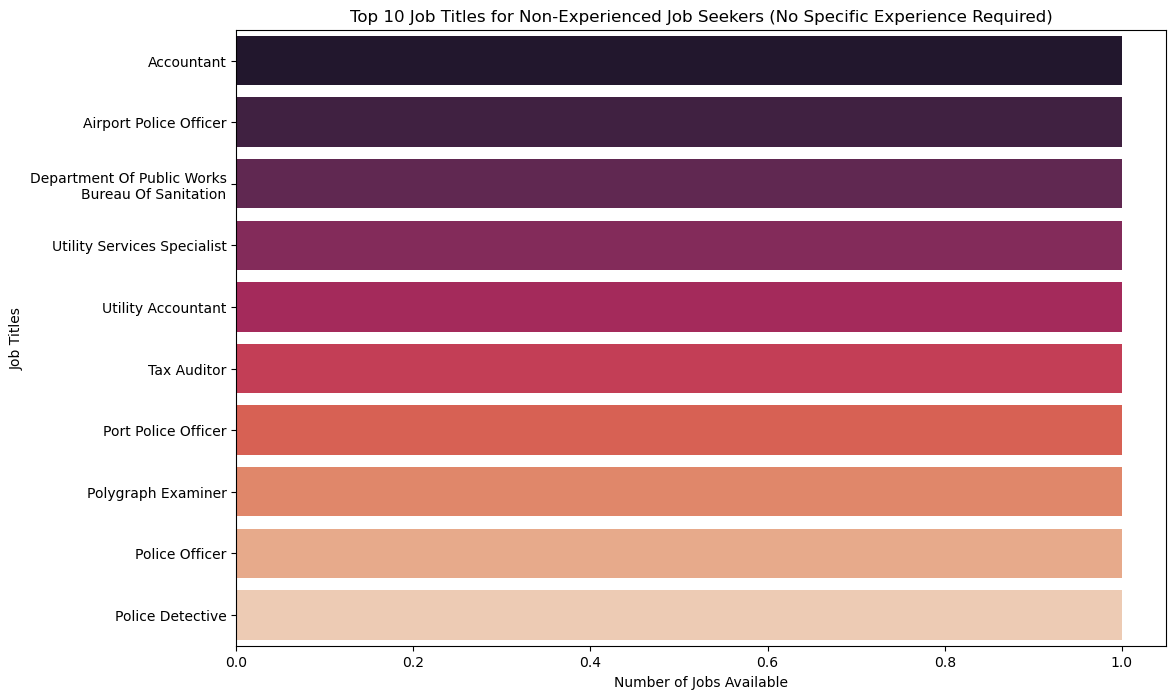

In [86]:
### Write you code here ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset for jobs with zero experience years and "Not Specified" EXP_JOB_CLASS_TITLE
no_exp_jobs_viz = data[(data['EXPERIENCE_LENGTH'] == 0) & 
                       (data['EXP_JOB_CLASS_TITLE'].str.lower() == "not specified")]

# Counting the number of such jobs for different job titles
job_title_counts_no_exp = no_exp_jobs_viz['JOB_CLASS_TITLE'].value_counts().head(10)

# Creating a bar chart for the top 10 job titles
plt.figure(figsize=(12, 8))
sns.barplot(x=job_title_counts_no_exp.values, y=job_title_counts_no_exp.index, palette="rocket")

# Adding labels and title
plt.title('Top 10 Job Titles for Non-Experienced Job Seekers (No Specific Experience Required)')
plt.xlabel('Number of Jobs Available')
plt.ylabel('Job Titles')

# Displaying the chart
plt.show()


### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

SCHOOL_TYPE
Apprenticeship           85414.700000
College Or University    91543.870504
High School              63811.392857
Name: Average Salary, dtype: float64


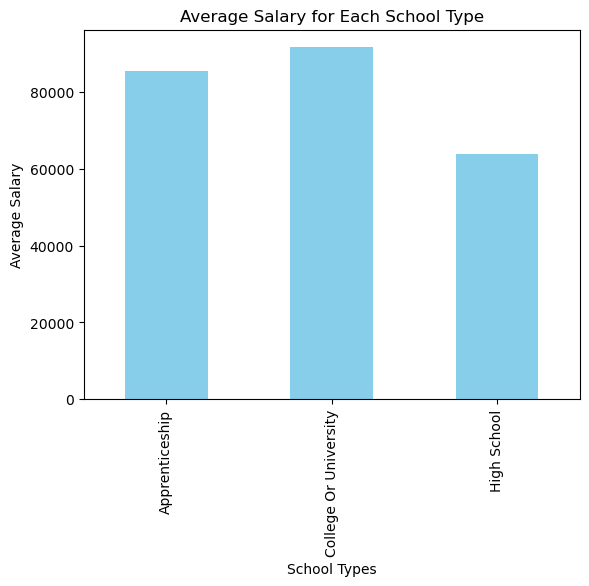

In [105]:
### Write you code here ###
S_A_U = data[data["SCHOOL_TYPE"] != "Not-Required"]

# Group by School Type and calculate the mean of Average Salary
type_and_salary = S_A_U.groupby('SCHOOL_TYPE')['Average Salary'].mean()

# Print the mean Average Salary for each School Type
print(type_and_salary)

# Plotting the mean Average Salary for each School Type
type_and_salary.plot(kind='bar', title='Average Salary for Each School Type', color='skyblue')

# Adding labels to the plot
plt.xlabel('School Types')
plt.ylabel('Average Salary')

# Show the plot
plt.show()

### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

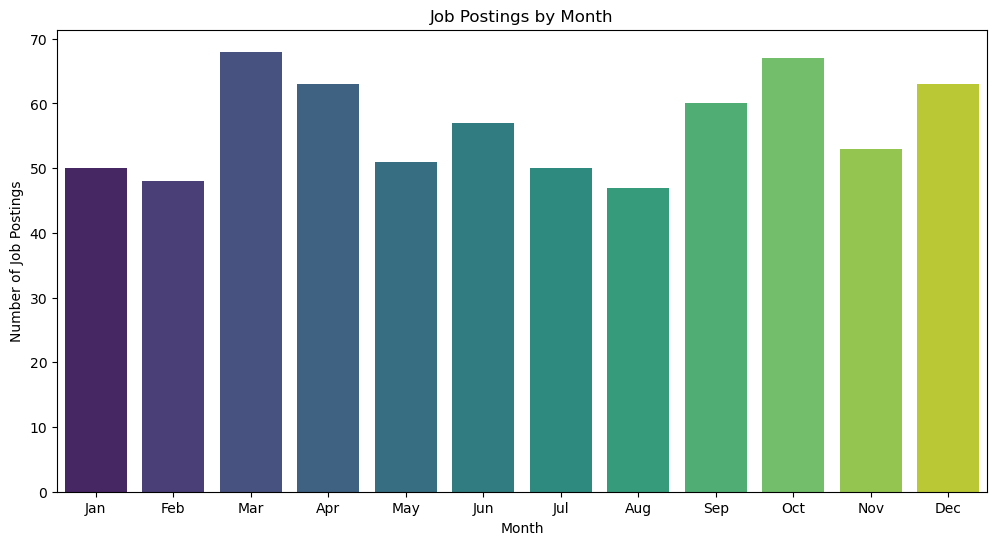

In [88]:
### Write you code here ### 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure OPEN_DATE is in datetime format
data['OPEN_DATE'] = pd.to_datetime(data['OPEN_DATE'], errors='coerce')

# Extract the month from the OPEN_DATE
data['OPEN_MONTH'] = data['OPEN_DATE'].dt.month

# Counting job postings by month
job_postings_by_month = data['OPEN_MONTH'].value_counts().sort_index()

# Creating a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=job_postings_by_month.index, y=job_postings_by_month.values, palette="viridis")

# Adding labels and title
plt.title('Job Postings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')

# Displaying the chart
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
#March is the best 

### <span style="color:brown">Q4:

Is experience more important than educational level?

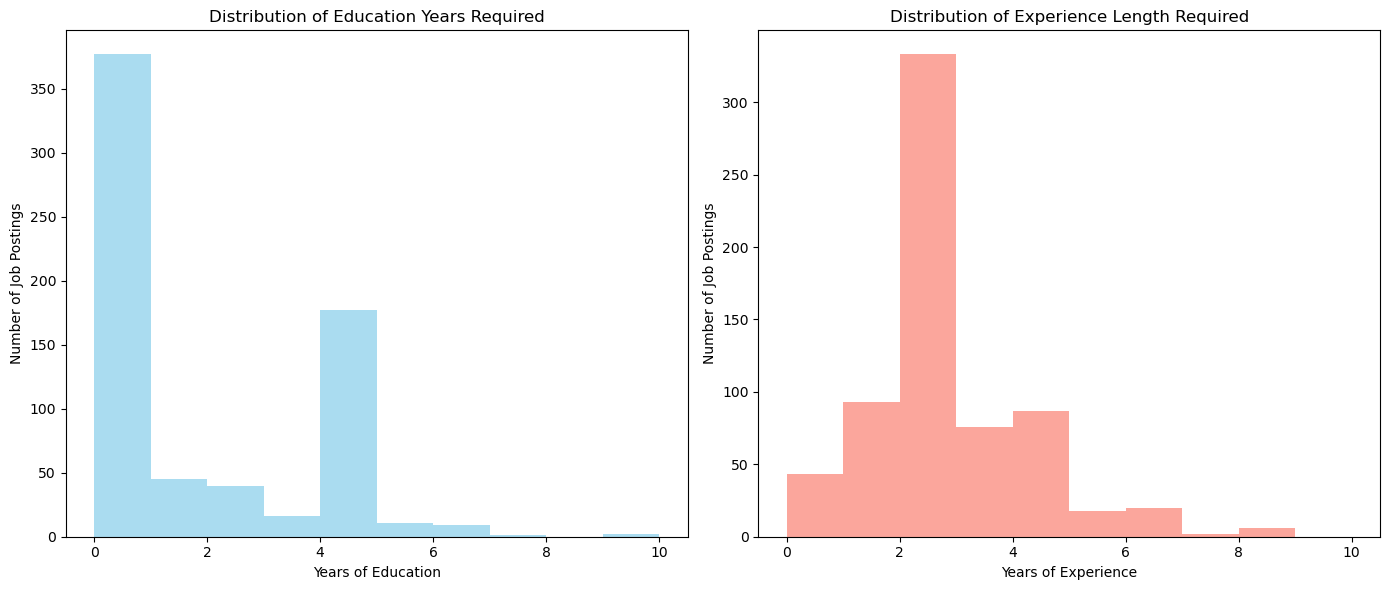

In [89]:
### Write you code here ###
# Plotting histograms for education and experience requirements
plt.figure(figsize=(14, 6))

# Histogram for education years
plt.subplot(1, 2, 1)
plt.hist(data['EDUCATION_YEARS'], bins=range(0, 11), color='skyblue', alpha=0.7)
plt.title('Distribution of Education Years Required')
plt.xlabel('Years of Education')
plt.ylabel('Number of Job Postings')

# Histogram for experience length
plt.subplot(1, 2, 2)
plt.hist(data['EXPERIENCE_LENGTH'], bins=range(0, 11), color='salmon', alpha=0.7)
plt.title('Distribution of Experience Length Required')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Job Postings')

plt.tight_layout()
plt.show()

### <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

EXP_JOB_CLASS_TITLE
SUPERVISOR              67
ENGINEER                53
not specified           41
MANAGEMENT              40
MECHANIC                39
                        ..
FINANCIAL MANAGEMENT     1
JUDGE                    1
SEAMAN                   1
MERCHANT                 1
CURATOR                  1
Name: count, Length: 139, dtype: int64


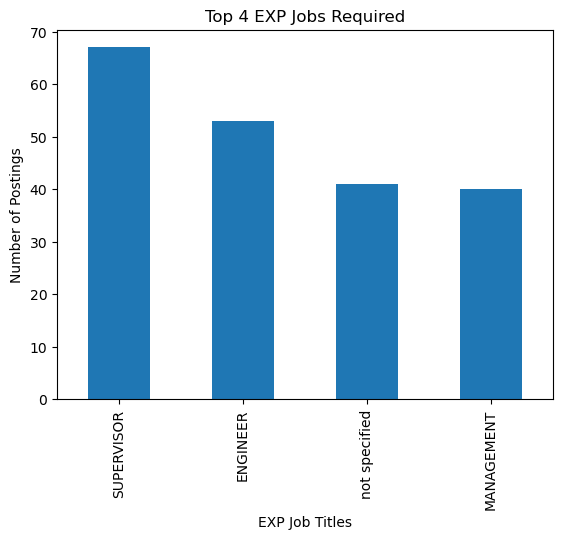

In [90]:
exp_job_title_counts = data["EXP_JOB_CLASS_TITLE"].value_counts()

# Printing the value counts
print(exp_job_title_counts)

# Plotting the top 4 EXP Job Titles
exp_job_title_counts.head(4).plot(kind='bar', title='Top 4 EXP Jobs Required')

# Adding labels
plt.xlabel('EXP Job Titles')
plt.ylabel('Number of Postings')

# Display the plot
plt.show()

### <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER 
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?

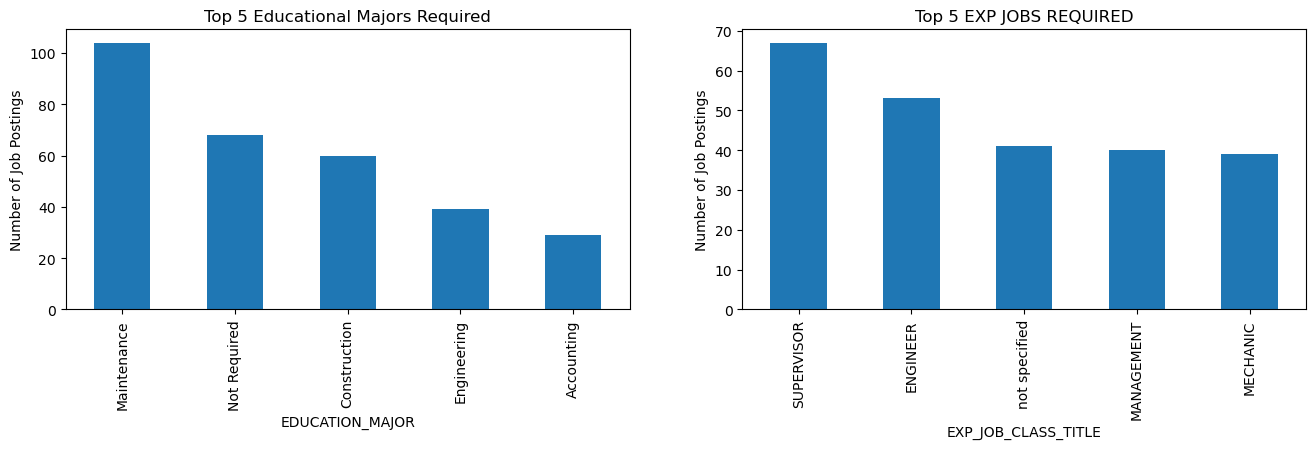

In [91]:
### Write you code here ###

# Set the size of the entire figure
plt.figure(figsize=(16, 8))

# First subplot: Top 5 Educational Majors Required
plt.subplot(2, 2, 1)
data["EDUCATION_MAJOR"].value_counts().head(5).plot(kind='bar', title="Top 5 Educational Majors Required")
plt.ylabel('Number of Job Postings')

# Second subplot: Top 5 Experience Job Titles Required
plt.subplot(2, 2, 2)
data["EXP_JOB_CLASS_TITLE"].value_counts().head(5).plot(kind='bar', title='Top 5 EXP JOBS REQUIRED')
plt.ylabel('Number of Job Postings')

# Show the plot
plt.show()
#see "maintenance ,construction , engineering ,mechanic" in the most common required bulletins

### <span style="color:brown">Q7:

The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

In [92]:
### Write you code here ###
# Count of jobs suitable for non-experienced workers (0-1 years of experience)
non_experienced_jobs_count = data[data['EXPERIENCE_LENGTH'] <= 1].shape[0]

# Count of jobs requiring more experience (>1 years)
experienced_jobs_count = data[data['EXPERIENCE_LENGTH'] > 1].shape[0]

# Comparison
if non_experienced_jobs_count > experienced_jobs_count:
    recommendation = "Focus on building new schools for more fresh, non-experienced workers."
else:
    recommendation = "Encourage the work environment to help workers get promotions."

print("Recommendation:", recommendation)


Recommendation: Encourage the work environment to help workers get promotions.


### <span style="color:brown">Q8:

What is the average salary for worker with a driver licence?

DRIVERS_LICENSE_REQ
No     91796.733333
Yes    92306.675610
Name: Average Salary, dtype: float64


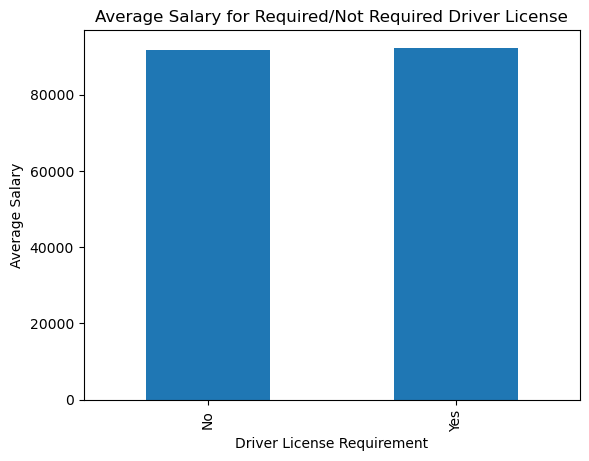

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


salary_and_license = data.groupby('DRIVERS_LICENSE_REQ')['Average Salary'].mean()

print(salary_and_license)


salary_and_license.plot(kind='bar', title='Average Salary for Required/Not Required Driver License')


plt.xlabel('Driver License Requirement')
plt.ylabel('Average Salary')


plt.show()


## <span style="color:brown">Q9:

list the most feature that effect the salary of the worker.

                   Unnamed: 0  JOB_CLASS_NO  EDUCATION_YEARS  \
Unnamed: 0           1.000000     -0.031222        -0.078330   
JOB_CLASS_NO        -0.031222      1.000000         0.048620   
EDUCATION_YEARS     -0.078330      0.048620         1.000000   
EXPERIENCE_LENGTH   -0.065375     -0.015500         0.086668   
COURSE_COUNT        -0.110238     -0.011568         0.140403   
COURSE_LENGTH       -0.097257      0.006382         0.154782   
Average Salary      -0.024390      0.377364         0.040765   

                   EXPERIENCE_LENGTH  COURSE_COUNT  COURSE_LENGTH  \
Unnamed: 0                 -0.065375     -0.110238      -0.097257   
JOB_CLASS_NO               -0.015500     -0.011568       0.006382   
EDUCATION_YEARS             0.086668      0.140403       0.154782   
EXPERIENCE_LENGTH           1.000000     -0.167348      -0.131536   
COURSE_COUNT               -0.167348      1.000000       0.644163   
COURSE_LENGTH              -0.131536      0.644163       1.000000   
Aver

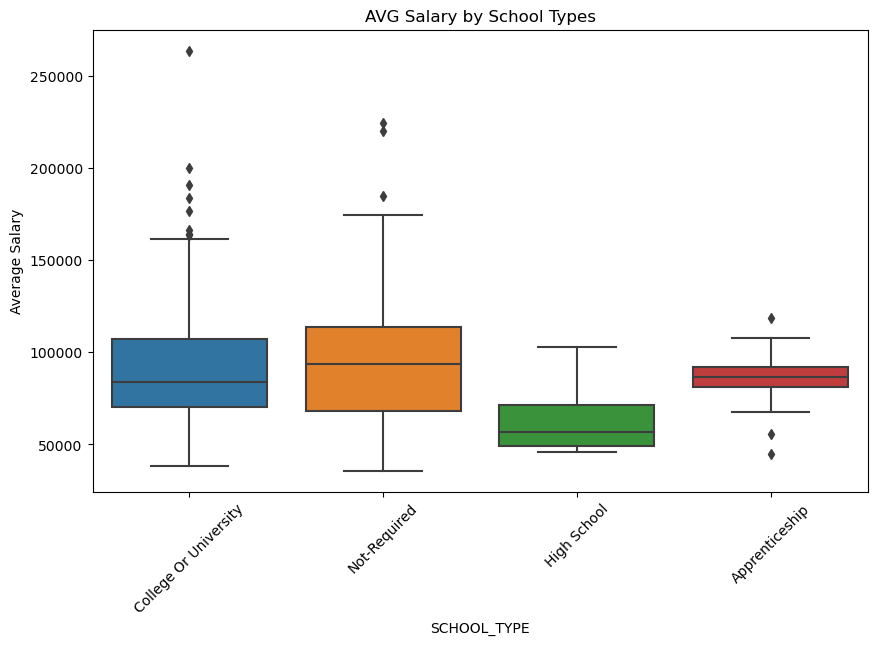

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Convert 'Average Salary' to numeric, coerce errors to NaN
data['Average Salary'] = pd.to_numeric(data['Average Salary'], errors='coerce')

# Filter out only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate and print correlation matrix for numeric data only
print(numeric_data.corr())
# Boxplot for 'School Types' vs 'AVG Salary'
plt.figure(figsize=(10, 6))
sns.boxplot(x='SCHOOL_TYPE', y='Average Salary', data=data)
plt.title('AVG Salary by School Types')
plt.xticks(rotation=45) 
plt.show()




## <span style="color:brown">Q10:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

Univariate Analysis for: Unnamed: 0
count    678.000000
mean     340.777286
std      196.811186
min        0.000000
25%      171.250000
50%      340.500000
75%      510.750000
max      682.000000
Name: Unnamed: 0, dtype: float64


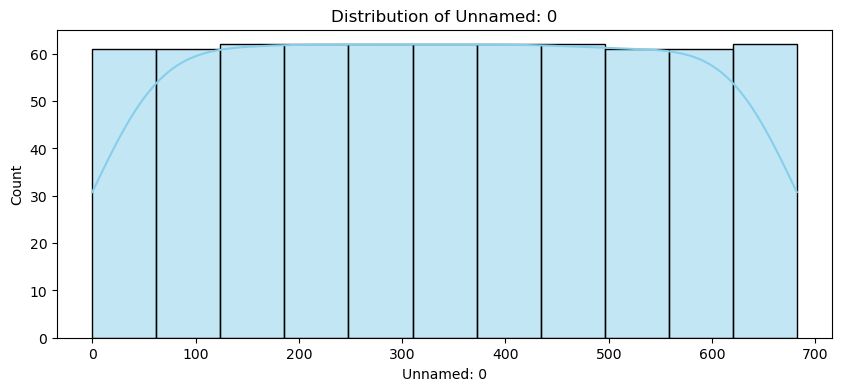

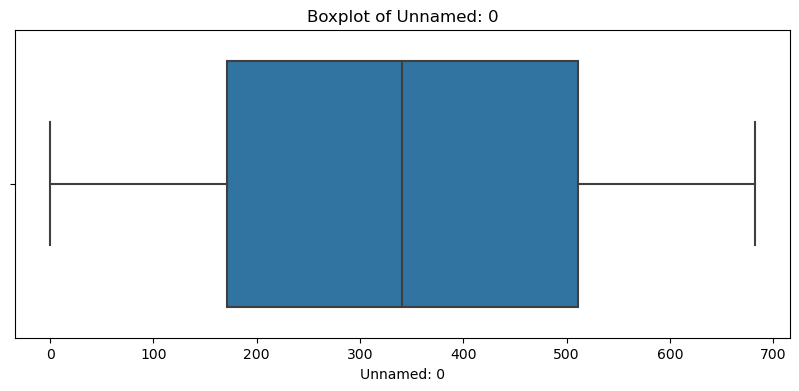

Insights:
- Mean of Unnamed: 0: 340.7772861356932
- Median of Unnamed: 0: 340.5
- Standard Deviation of Unnamed: 0: 196.81118638800538

---

Univariate Analysis for: JOB_CLASS_NO
count     677.000000
mean     4198.474151
std      2440.636879
min       602.000000
25%      2236.000000
50%      3711.000000
75%      5816.000000
max      9734.000000
Name: JOB_CLASS_NO, dtype: float64


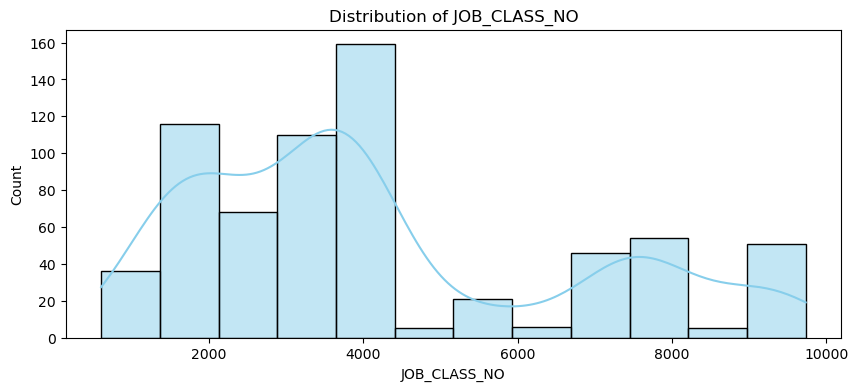

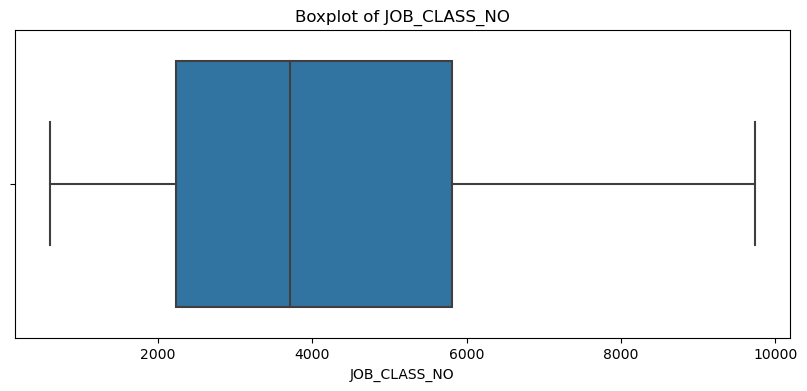

Insights:
- Mean of JOB_CLASS_NO: 4198.474150664697
- Median of JOB_CLASS_NO: 3711.0
- Standard Deviation of JOB_CLASS_NO: 2440.636878759515

---

Univariate Analysis for: EDUCATION_YEARS
count    678.000000
mean       1.497050
std        1.910669
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max        9.000000
Name: EDUCATION_YEARS, dtype: float64


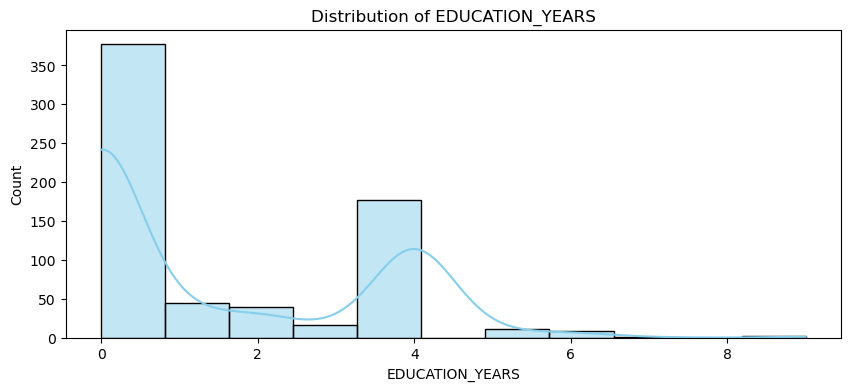

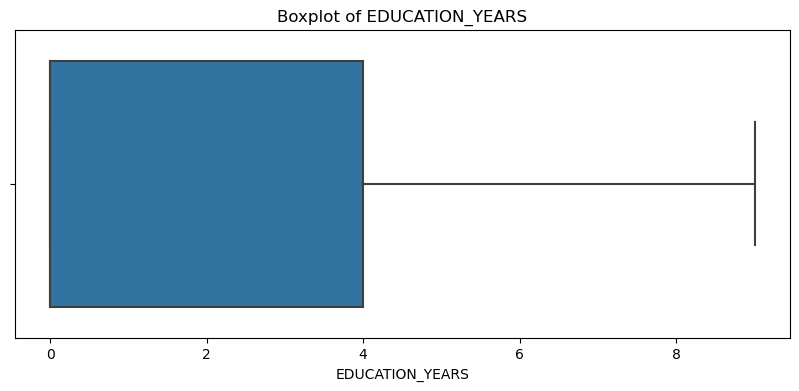

Insights:
- Mean of EDUCATION_YEARS: 1.4970501474926254
- Median of EDUCATION_YEARS: 0.0
- Standard Deviation of EDUCATION_YEARS: 1.9106689882631374

---

Univariate Analysis for: EXPERIENCE_LENGTH
count    678.000000
mean       2.370206
std        1.409023
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: EXPERIENCE_LENGTH, dtype: float64


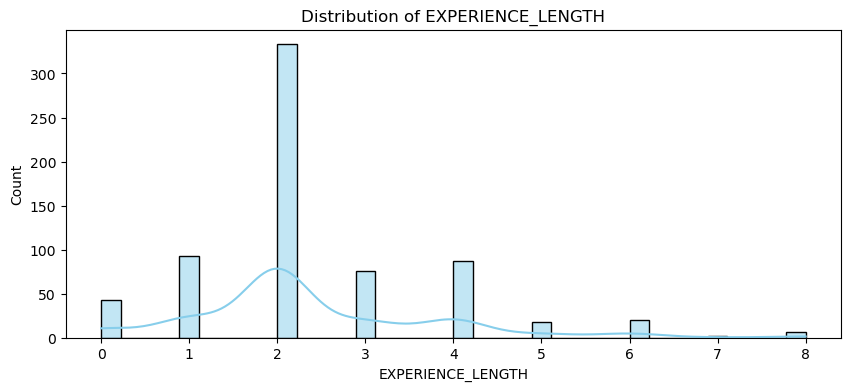

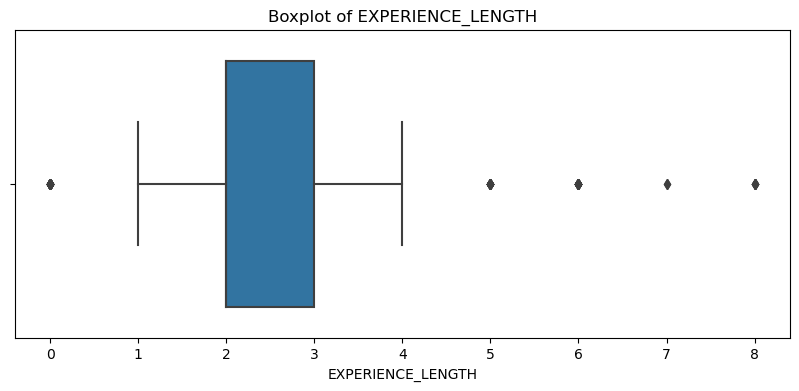

Insights:
- Mean of EXPERIENCE_LENGTH: 2.370206489675516
- Median of EXPERIENCE_LENGTH: 2.0
- Standard Deviation of EXPERIENCE_LENGTH: 1.409022504488761

---

Univariate Analysis for: COURSE_COUNT
count    678.000000
mean       0.336283
std        0.850169
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: COURSE_COUNT, dtype: float64


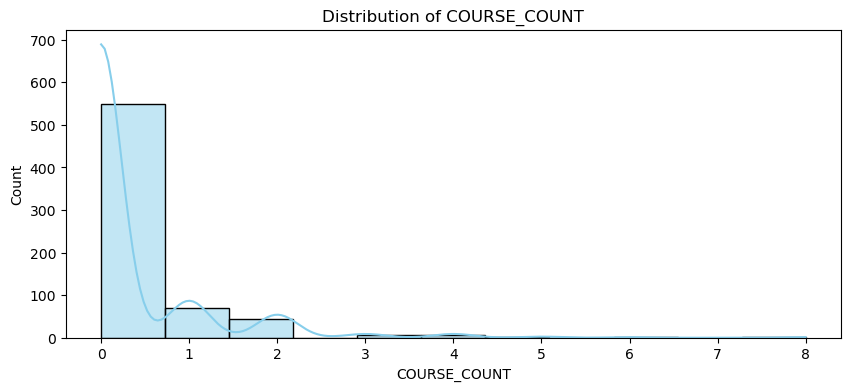

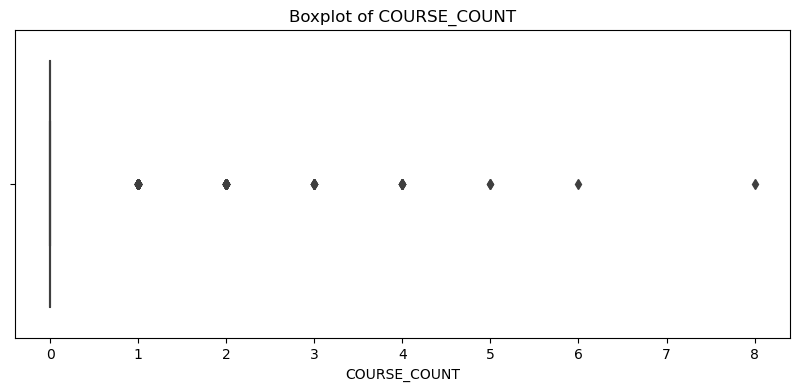

Insights:
- Mean of COURSE_COUNT: 0.336283185840708
- Median of COURSE_COUNT: 0.0
- Standard Deviation of COURSE_COUNT: 0.8501693580767261

---

Univariate Analysis for: COURSE_LENGTH
count    678.000000
mean       0.693215
std        1.762145
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: COURSE_LENGTH, dtype: float64


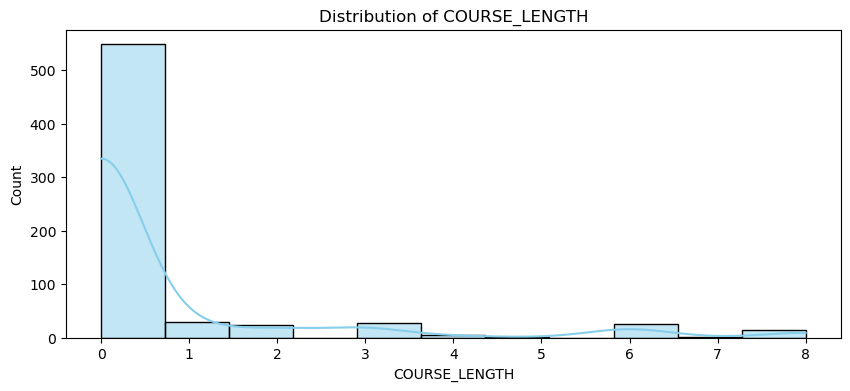

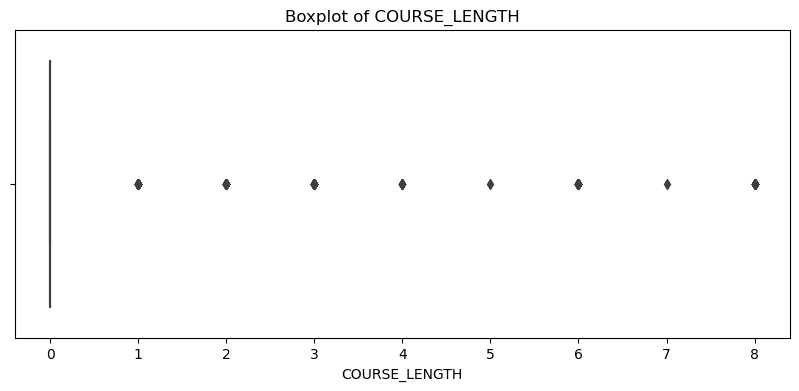

Insights:
- Mean of COURSE_LENGTH: 0.6932153392330384
- Median of COURSE_LENGTH: 0.0
- Standard Deviation of COURSE_LENGTH: 1.7621445200501578

---

Univariate Analysis for: Average Salary
count       676.000000
mean      92176.154586
std       31259.134490
min       34671.000000
25%       69905.500000
50%       88191.750000
75%      109361.375000
max      263610.000000
Name: Average Salary, dtype: float64


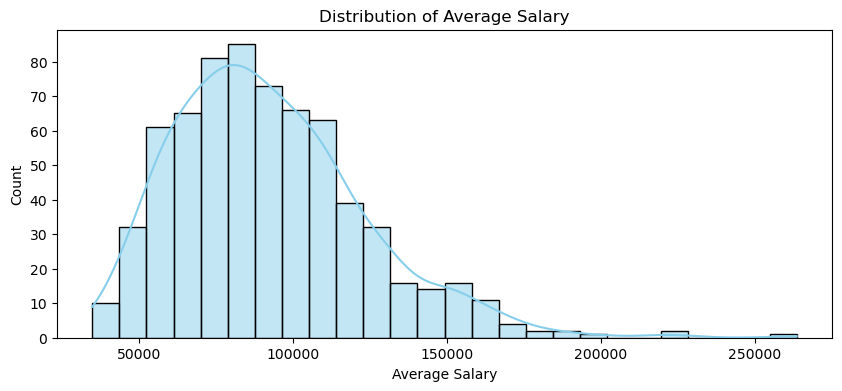

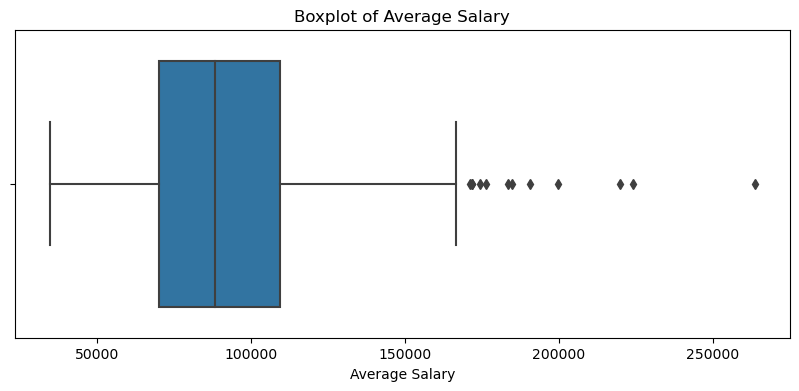

Insights:
- Mean of Average Salary: 92176.15458579881
- Median of Average Salary: 88191.75
- Standard Deviation of Average Salary: 31259.134489998996

---

Univariate Analysis for: OPEN_MONTH
count    677.000000
mean       6.608567
std        3.466934
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: OPEN_MONTH, dtype: float64


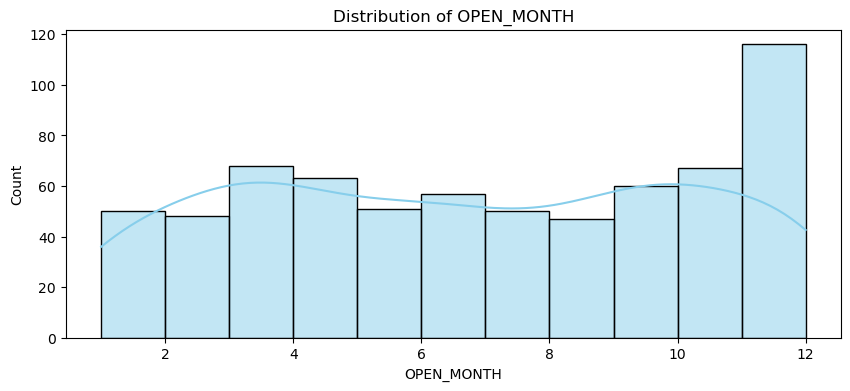

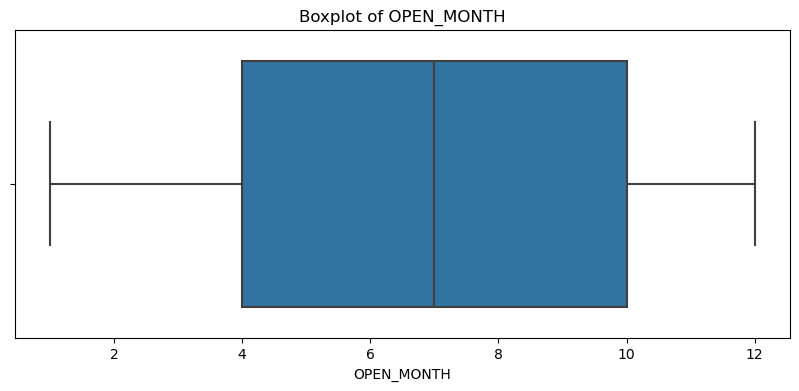

Insights:
- Mean of OPEN_MONTH: 6.608567208271787
- Median of OPEN_MONTH: 7.0
- Standard Deviation of OPEN_MONTH: 3.466933895588248

---



In [95]:
### Write you code here ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select only numerical (continuous) columns
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each continuous column to perform univariate analysis
for column in continuous_columns:
    print(f"Univariate Analysis for: {column}")
    
    # 1. Descriptive Statistics
    print(data[column].describe())

    # 2. Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.show()

    # 3. Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    
    # 4. Insights 
    print("Insights:")
    print(f"- Mean of {column}: {data[column].mean()}")
    print(f"- Median of {column}: {data[column].median()}")
    print(f"- Standard Deviation of {column}: {data[column].std()}")
    
    print("\n---\n")

#note: use_univariate with continouius

## <span style="color:brown">Q11:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


In [96]:
### Write you code here ###
#note: use_univariate with catergircal
#using pie chart

## Great Job.

                        FILE_NAME JOB_CLASS_TITLE  \
count                         678             678   
unique                        678             678   
top     311 DIRECTOR  9206 041814    311 Director   
freq                            1               1   
mean                          NaN             NaN   
min                           NaN             NaN   
25%                           NaN             NaN   
50%                           NaN             NaN   
75%                           NaN             NaN   
max                           NaN             NaN   

                                               JOB_DUTIES  \
count                                                 672   
unique                                                672   
top     A 311 Director is responsible for the successf...   
freq                                                    1   
mean                                                  NaN   
min                                               

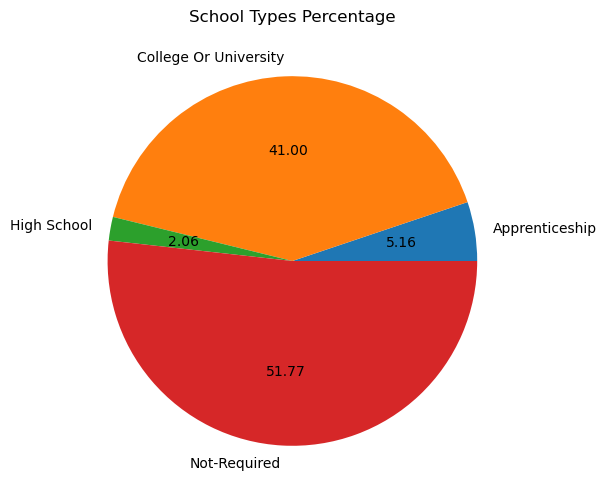

D:\Anaco\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


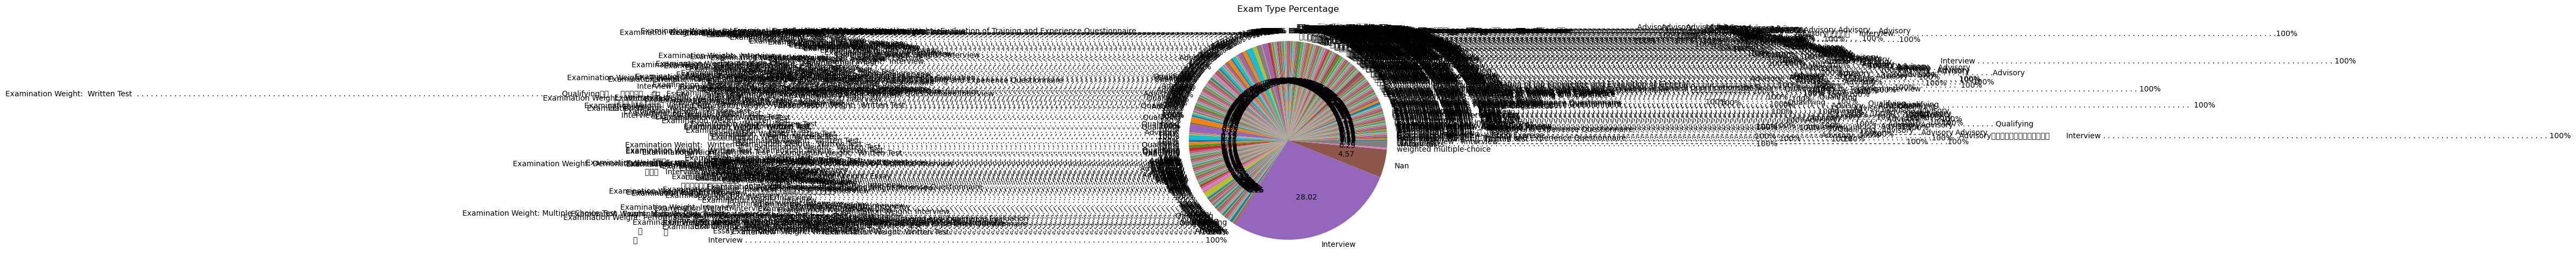

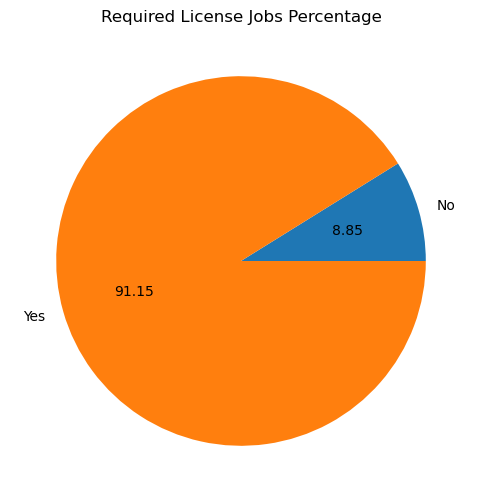

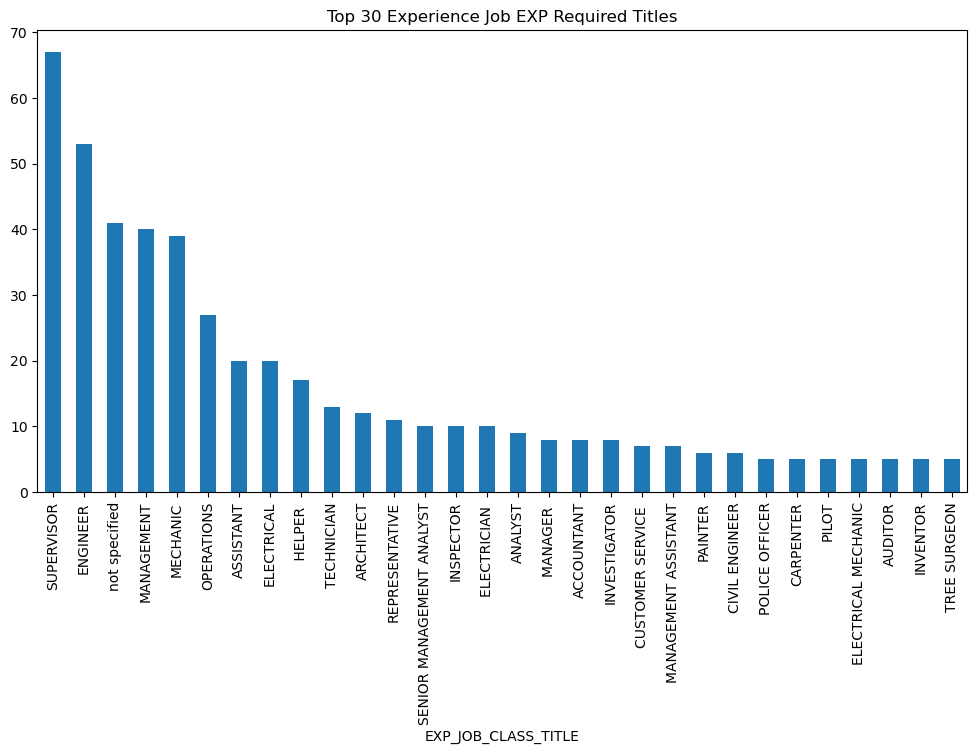

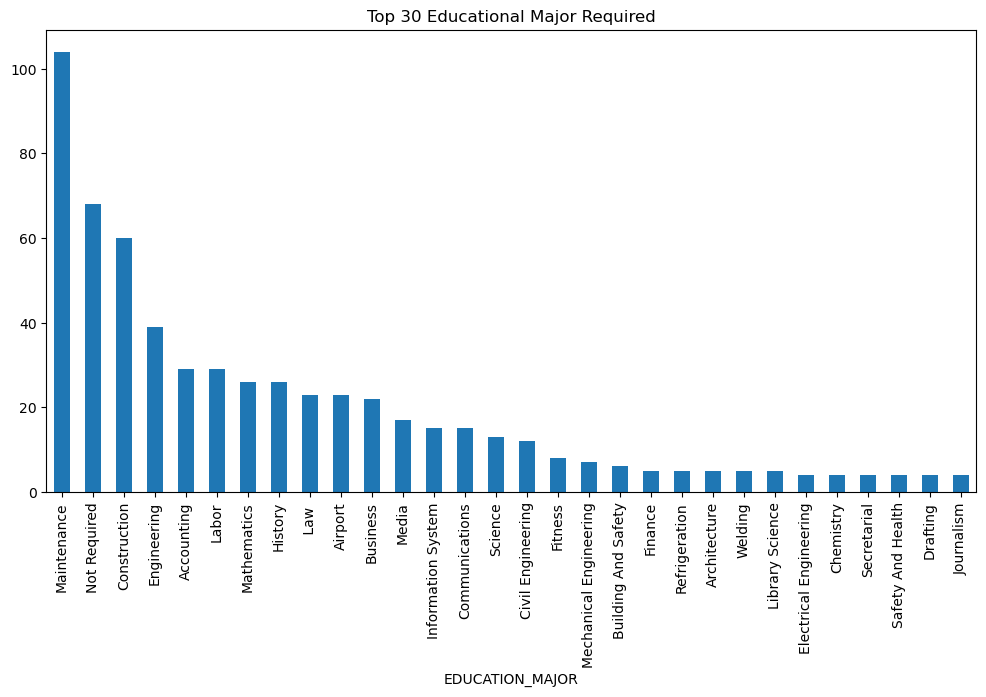

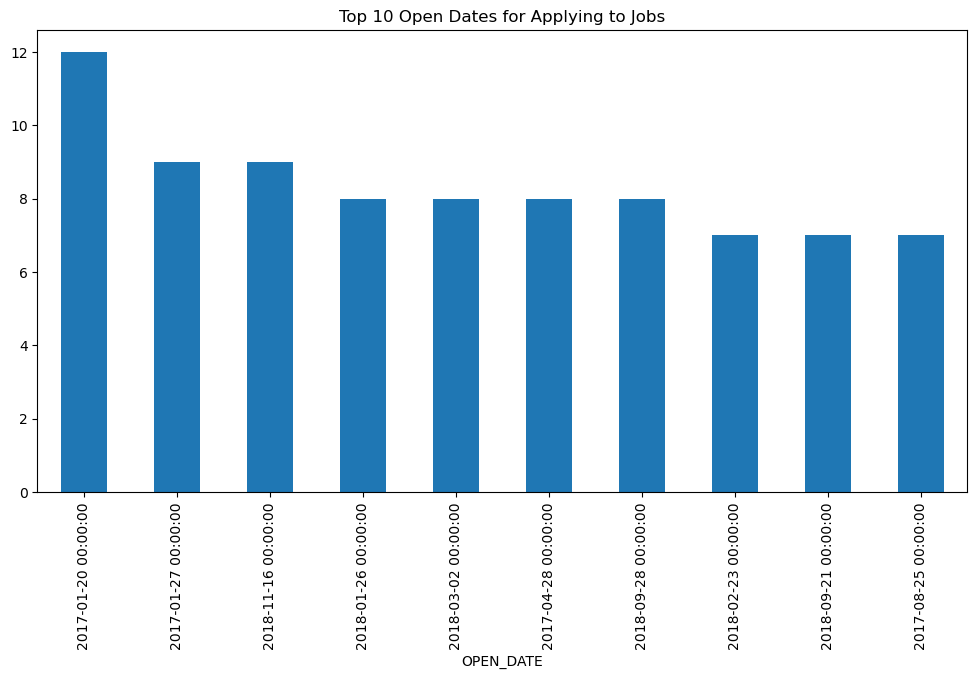

In [97]:
import matplotlib.pyplot as plt


# Descriptive statistics for non-numerical data
print(data.describe(exclude="number"))

# Pie chart for School Types
data.groupby('SCHOOL_TYPE').size().plot(
    kind='pie', autopct='%.2f', ylabel="", 
    title="School Types Percentage", figsize=(6, 6))
plt.show()

# Pie chart for Exam Type
data.groupby('EXAM_TYPE').size().plot(
    kind='pie', autopct='%.2f', ylabel="", 
    title="Exam Type Percentage", figsize=(6, 6))
plt.show()

# Pie chart for Required License
data.groupby('DRIVERS_LICENSE_REQ').size().plot(
    kind='pie', autopct='%.2f', ylabel="", 
    title="Required License Jobs Percentage", figsize=(6, 6))
plt.show()

# Bar chart for Top 30 Experience Job Titles Required
data['EXP_JOB_CLASS_TITLE'].value_counts().head(30).plot(
    kind='bar', title='Top 30 Experience Job EXP Required Titles', figsize=(12, 6))
plt.show()

# Bar chart for Top 30 Educational Majors Required
data['EDUCATION_MAJOR'].value_counts().head(30).plot(
    kind='bar', title='Top 30 Educational Major Required', figsize=(12, 6))
plt.show()

# Bar chart for Top 10 Open Dates for Applying to Jobs
data['OPEN_DATE'].value_counts().head(10).plot(
    kind='bar', title='Top 10 Open Dates for Applying to Jobs', figsize=(12, 6))
plt.show()
